In [1]:
suppressPackageStartupMessages({
    library(monocle)
    
    library(RColorBrewer)
    library(dplyr)
    library(ggplot2)
    library(reshape2)
})

Warning message:
“replacing previous import by ‘splines::splineDesign’ when loading ‘VGAM’”Warning message:
“replacing previous import by ‘grid::arrow’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘grid::unit’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘igraph::clusters’ when loading ‘monocle’”Warning message:
“replacing previous import by ‘ggplot2::Position’ when loading ‘monocle’”

This analysis was made using Monocle version 2.3.5. The source code for Monocle 2.3.5 is available as a supplementary file to Cao et al. 2017 on the Science website. We are working on updating the analysis to the latest version of Monocle.

In [2]:
sessionInfo()

R version 3.2.1 (2015-06-18)
Platform: x86_64-unknown-linux-gnu (64-bit)
Running under: CentOS release 6.8 (Final)

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] splines   stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] reshape2_1.4.2      dplyr_0.7.1         RColorBrewer_1.1-2 
 [4] monocle_2.3.5       DDRTree_0.1.5       irlba_2.2.1        
 [7] VGAM_1.0-3          ggplot2_2.2.1       Biobase_2.30.0     
[10] BiocGenerics_0.16.1 Matrix_1.2-7.1     

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.11           bindr_0.1              plyr_1.8.4            
 [4

In [3]:
# at certain "checkpoints" in this notebook, we save our progress to this RData file
# run this cell to load your progress if you have already reached through one or more checkpoints in the notebook
load("RData/L2.experiment.1.RData")

In [11]:
system("mkdir -p RData")

In [9]:
UMI.counts = list()

In [12]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.plates.1-2.RData",
    destfile = "RData/Cao_et_al_2017.experiment.1.plates.1-2.RData")

In [13]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.plates.3-4.RData",
    destfile = "RData/Cao_et_al_2017.experiment.1.plates.3-4.RData")

In [14]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.plate.5.RData",
    destfile = "RData/Cao_et_al_2017.experiment.1.plate.5.RData")

In [15]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.plate.6.RData",
    destfile = "RData/Cao_et_al_2017.experiment.1.plate.6.RData")

In [16]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.plate.7.RData",
    destfile = "RData/Cao_et_al_2017.experiment.1.plate.7.RData")

In [17]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.plates.8-10.RData",
    destfile = "RData/Cao_et_al_2017.experiment.1.plates.8-10.RData")

In [18]:
load("RData/Cao_et_al_2017.experiment.1.plates.1-2.RData")
UMI.counts$plate_1_2 = UMI_count
rm(UMI_count)

In [19]:
load("RData/Cao_et_al_2017.experiment.1.plates.3-4.RData")
UMI.counts$plate_3_4 = UMI_count
rm(UMI_count)

In [20]:
load("RData/Cao_et_al_2017.experiment.1.plate.5.RData")
UMI.counts$plate_5 = UMI_count
rm(UMI_count)

In [21]:
load("RData/Cao_et_al_2017.experiment.1.plate.6.RData")
UMI.counts$plate_6 = UMI_count
rm(UMI_count)

In [22]:
load("RData/Cao_et_al_2017.experiment.1.plate.7.RData")
UMI.counts$plate_7 = UMI_count
rm(UMI_count)

In [23]:
load("RData/Cao_et_al_2017.experiment.1.plates.8-10.RData")
UMI.counts$plate_8_9_10 = UMI_count
rm(UMI_count)

In [24]:
mat = do.call(cbind, UMI.counts)

In [26]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/Cao_et_al_2017.experiment.1.gene_annotations",
    destfile = "RData/Cao_et_al_2017.experiment.1.gene_annotations.tsv")

In [27]:
genes = read.csv(
    "RData/Cao_et_al_2017.experiment.1.gene_annotations.tsv",
    col.names=c("id", "type", "exon_intron", "name", "index"))

genes = genes[genes$id %in% rownames(UMI.counts$plate_1_2),]

In [29]:
mat.exon = mat[genes$exon_intron == "exon",]
mat.intron = mat[genes$exon_intron == "intron",]
nrow(mat.exon) == nrow(mat.intron)
mat = mat.exon + mat.intron
mat = mat[order(rownames(mat)),]
rm(list=c("mat.exon", "mat.intron"))

[1] TRUE

In [30]:
download.file(
    "http://jpacker-data.s3.amazonaws.com/public/C.elegans.WB253.gene.id.to.symbol",
    destfile = "RData/C.elegans.WB253.gene.id.to.symbol.tsv")

In [31]:
gene.symbols = read.table(
    "RData/C.elegans.WB253.gene.id.to.symbol.tsv",
    col.names = c("gene_id", "symbol"), colClasses = rep("character", 2))

rownames(gene.symbols) = gene.symbols$gene_id

sum(!(rownames(mat) %in% rownames(gene.symbols))) == 0

[1] TRUE

In [32]:
pd = new("AnnotatedDataFrame", data = data.frame(
    cell = colnames(mat),
    row.names = colnames(mat),
    n.umi = colSums(mat),
    plate = sapply(colnames(mat), function(x) strsplit(x, "-")[[1]][2])))
        
fd = new("AnnotatedDataFrame", data = data.frame(
    gene_id = gene.symbols$gene_id,
    symbol = gene.symbols$symbol,
    row.names = gene.symbols$gene_id))

cds = newCellDataSet(mat, phenoData = pd, featureData = fd, expressionFamily = negbinomial.size())
rm(mat)

Warning message in newCellDataSet(mat, phenoData = pd, featureData = fd, expressionFamily = negbinomial.size()):
“None of your featureData columns are named 'gene_short_name', some functions will not be able
           to take this function as input as a result”

In [33]:
sum(pData(cds)$n.umi < 100) / nrow(pData(cds))
sum(pData(cds)$n.umi < 200) / nrow(pData(cds))

[1] 0.2137112

[1] 0.3788066

In [34]:
pData(cds) %>% group_by(plate) %>% summarize(med.n.umi = median(n.umi))

plate med.n.umi
1  001   322.0    
2  002   316.5    
3  003   286.0    
4  004   296.5    
5  005   372.0    
6  006   366.5    
7  007   411.0    
8  008   319.0    
9  009   370.0    
10 010   344.0

In [35]:
original.cds = cds
cds = original.cds[, pData(cds)$n.umi >= 100]

In [36]:
dim(cds)

Features  Samples 
   20271    42035

In [18]:
cds = estimateSizeFactors(cds)
cds = estimateDispersions(cds)
cds = detectGenes(cds, 0.1)

Warning message:
“Deprecated, use tibble::rownames_to_column() instead.”Warning message in `[<-.data.frame`(`*tmp*`, res$mu == 0, value = structure(list(:
“provided 1 variable to replace 0 variables”Warning message in `[<-.data.frame`(`*tmp*`, res$mu == 0, value = structure(list(:
“provided 1 variable to replace 0 variables”Removing 512 outliers


Removing batch effects
Remove noise by PCA ...
Reduce dimension by tSNE ...


Distance cutoff calculated to 5.463998 


the length of the distance: 883449595


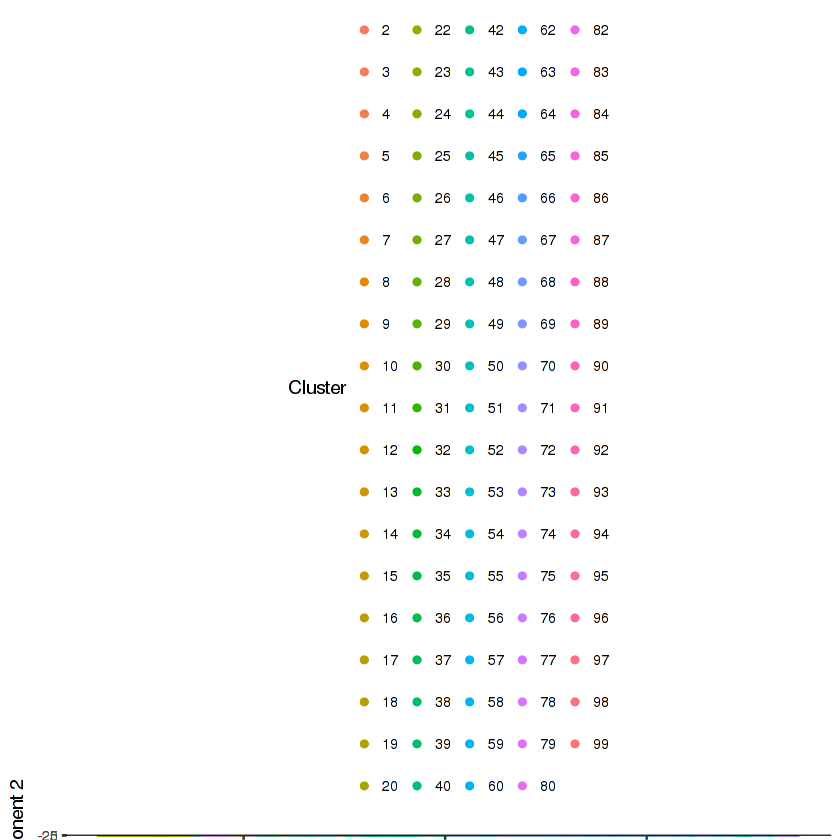

In [19]:
set.seed(123)
cds = reduceDimension(
    cds, max_components = 2, norm_method = "log",
    num_dim = 40, reduction_method = 'tSNE',
    residualModelFormulaStr = "~ plate", verbose = T)

pData(cds)$tsne_1 = reducedDimA(cds)[1,]
pData(cds)$tsne_2 = reducedDimA(cds)[2,]

The Monocle 2.3.5 default density peak parameters don't work well for this dataset.
We'll run density peak once then re-run it with more appropriate values for rho and delta.

Distance cutoff calculated to 5.457092 


the length of the distance: 883449595


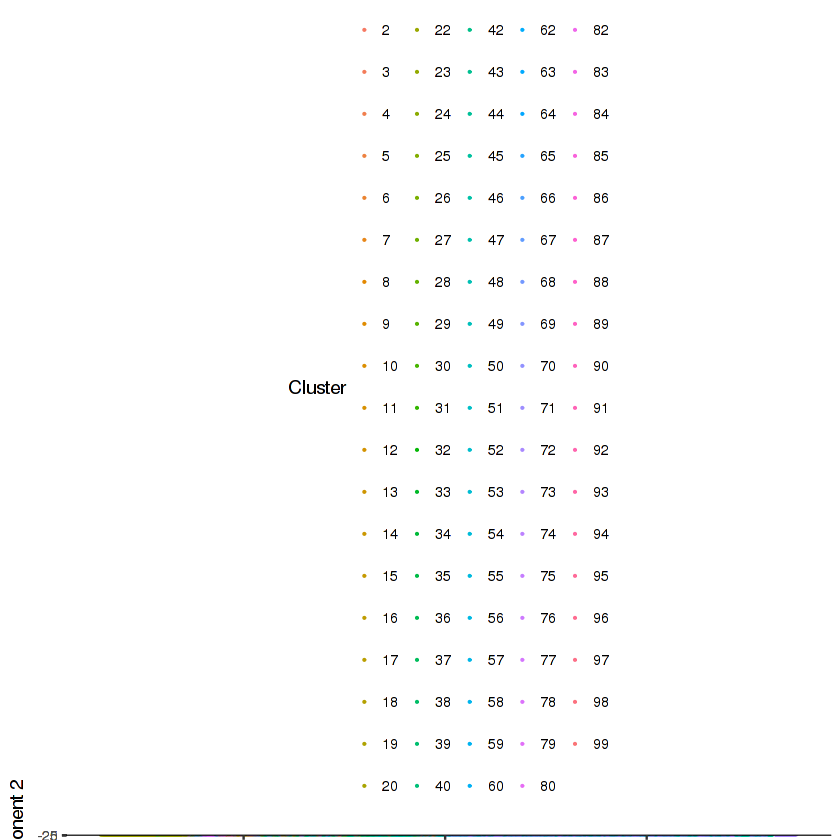

In [4]:
cds = clusterCells_Density_Peak(cds)
plot_cell_clusters(cds, cell_size = 0.1)

In [73]:
save.image("RData/L2.experiment.1.RData")

Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

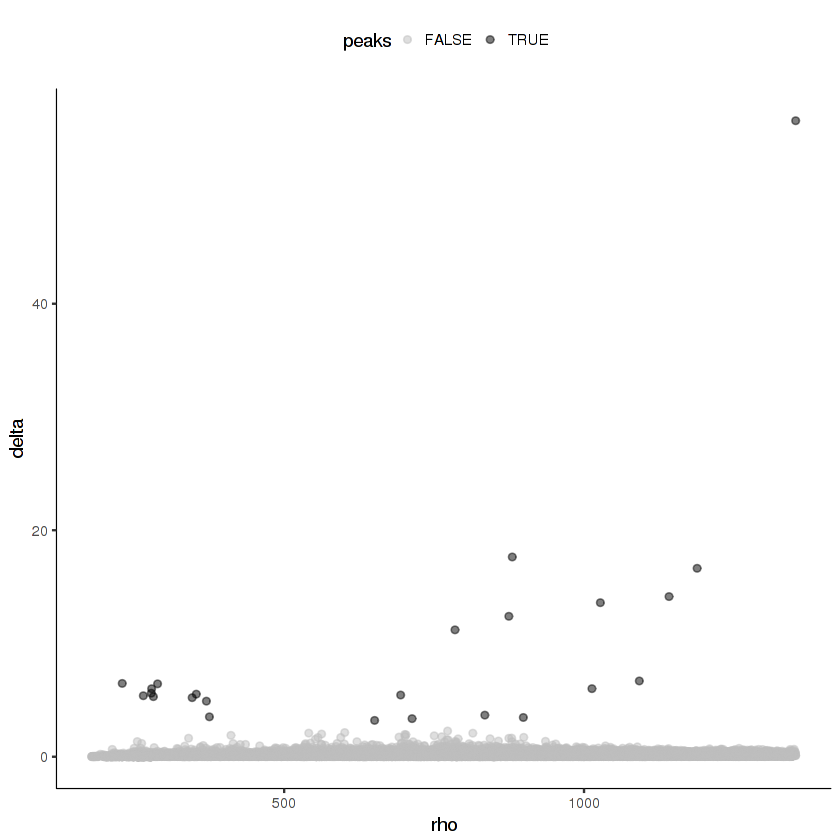

In [5]:
plot_rho_delta(cds, rho_threshold = 30, delta_threshold = 3)

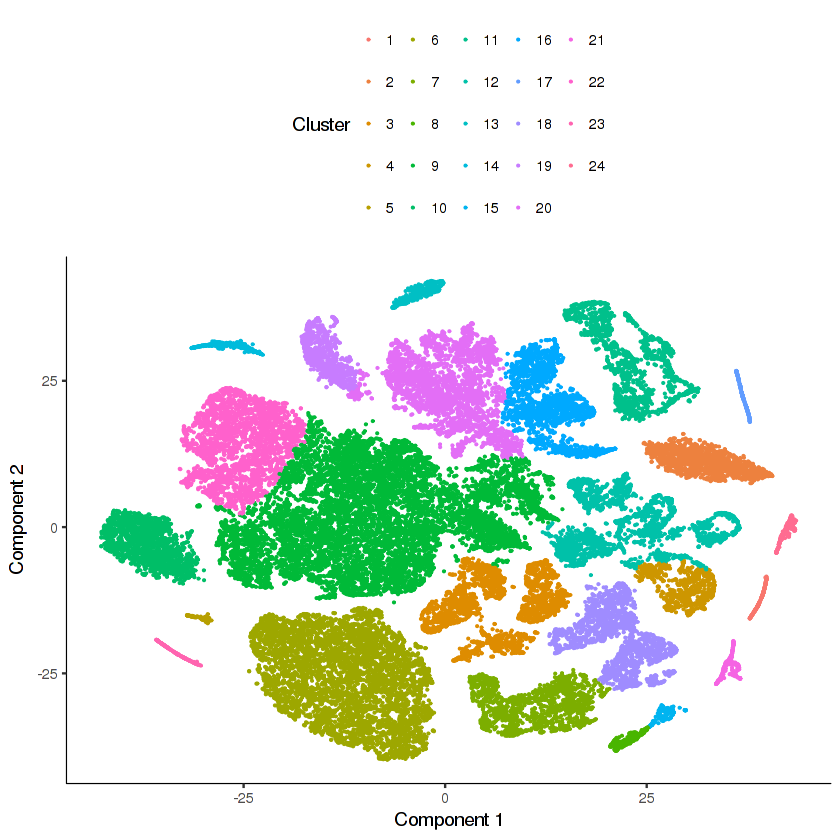

In [6]:
cds = clusterCells_Density_Peak(cds, rho_threshold = 30, delta_threshold = 3, skip_rho_sigma = T)
plot_cell_clusters(cds, cell_size = 0.1)

In [ ]:
save.image("RData/L2.experiment.1.RData")

Manually fixing a few cluster assignments where the density peak algorithm gives wonky results.

In [7]:
pData(cds)$Cluster = ifelse(with(pData(cds), Cluster == 20 & tsne_1 < -9), 19, pData(cds)$Cluster)

In [8]:
pData(cds)$Cluster = ifelse(with(pData(cds), Cluster == 3 & tsne_1 > 9 & tsne_2 > -17), 25, pData(cds)$Cluster)
pData(cds)$Cluster = ifelse(with(pData(cds), Cluster == 3 & tsne_1 > 1 & tsne_2 < -16.5), 26, pData(cds)$Cluster)
pData(cds)$Cluster = ifelse(with(pData(cds), Cluster == 9 & tsne_1 > -1.3 & tsne_2 < -4.5), 3, pData(cds)$Cluster)

In [9]:
pData(cds)$Cluster = ifelse(with(pData(cds),
    Cluster == 12 & tsne_1 > 21.5 & tsne_2 < -3.5 & (tsne_1 > 25 | tsne_2 < -5.0)), 4, pData(cds)$Cluster)
pData(cds)$Cluster = ifelse(with(pData(cds),
    Cluster == 12 & tsne_1 < 21.5 & tsne_2 < 1.0 & (tsne_1 < 19.5 | tsne_2 < -1.8)), 27, pData(cds)$Cluster)
pData(cds)$Cluster = ifelse(with(pData(cds),
    Cluster == 12 & tsne_1 < 25.0 & tsne_2 > 2.2 & (tsne_1 < 22.5 | tsne_2 > 4.0)), 28, pData(cds)$Cluster)
pData(cds)$Cluster = ifelse(with(pData(cds),
    Cluster == 12 & tsne_1 > 30.3 & tsne_2 > -5.0), 29, pData(cds)$Cluster)

In [10]:
pData(cds)$Cluster = ifelse(with(pData(cds),
    Cluster == 9 & ((tsne_1 > 1.5 + tsne_2 * 0.15) | (tsne_1 > 1.5 & tsne_2 > 6.5))), 30, pData(cds)$Cluster)

In [15]:
pData(cds)$Cluster = factor(pData(cds)$Cluster)

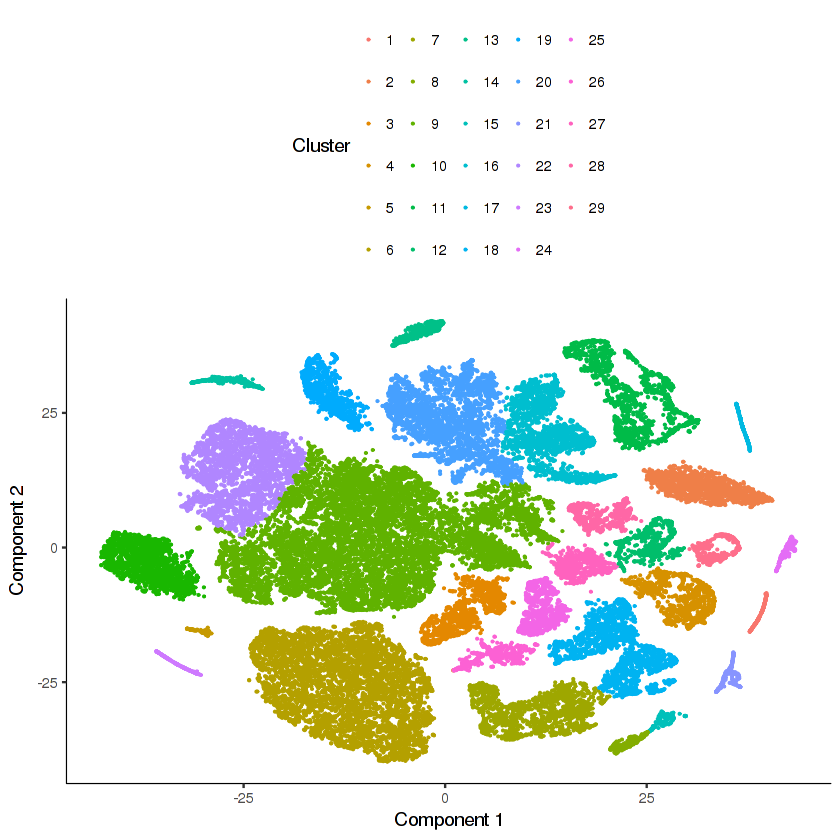

In [16]:
plot_cell_clusters(cds, cell_size = 0.1)

In [5]:
plot.expr = function(cds, gene, thresh=1) {
    gene.id = as.character(fData(cds)[fData(cds)$symbol == gene, "gene_id"])
    pData(cds)$tmp = exprs(cds)[gene.id,] >= thresh
    plot = ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = ifelse(tmp, 1, NA))) +
        geom_point(size = 0.2) +
        guides(color = F) +
        monocle:::monocle_theme_opts()
    pData(cds)$tmp = NULL
    return(plot)
}

In [27]:
get.cluster.markers = function(cds) {    
    cluster_means = lapply(1:length(unique(pData(cds)$Cluster)),
                           function(x) rowMeans(exprs(cds)[, pData(cds)$Cluster == x]))
    cluster_means = t(do.call(rbind, cluster_means))
    colnames(cluster_means) = 1:length(unique(pData(cds)$Cluster))
    specificity_scores = apply(cluster_means, 1, function(x) 1 - sum(x >= 0.1*max(x))/length(x))
    cluster_marker_scores = sweep(cluster_means, 1, specificity_scores^3, "*")
    
    cluster_marker_df = melt(cluster_marker_scores)
    names(cluster_marker_df) = c("gene_id", "cluster", "score")
    cluster_marker_df = inner_join(cluster_marker_df, fData(cds)[, 1:3], by= "gene_id") %>%
        group_by(cluster) %>% arrange(-score) %>% mutate(rank = rank(-score)) %>%
        filter(rank <= 100) %>% arrange(cluster, rank)
        
    return(cluster_marker_df)
}

In [28]:
get.gene.id = function(cds, symbol) {
    return(as.character(fData(cds)[fData(cds)$symbol == symbol, "gene_id"]))
}

expresses.gene = function(cds, symbol, thresh = 1) {
    return(exprs(cds)[get.gene.id(cds, symbol), ] >= thresh)
}

In [6]:
plot.expr.panels = function(cds, genes, thresh=1, ncol=4, cell_size=0.2) {
    df = pData(cds)[, c("cell", "tsne_1", "tsne_2")]
    gene.ids = sapply(genes, function(g) get.gene.id(cds, g))
    for (i in 1:length(genes)) {
        df[, sub("-", "_", genes[i])] = exprs(cds)[gene.ids[i],] > 0
    }
        
    df = melt(df, id.vars=c("cell", "tsne_1", "tsne_2"), variable.name="gene", value.name="expr")
    df$gene = sub("_", "-", df$gene)

    plot = ggplot(df, aes(x = tsne_1, y = tsne_2, color = ifelse(expr, 1, NA))) +
        facet_wrap(~ gene, ncol=ncol) +
        geom_point(size = cell_size) +
        guides(color = F) +
        monocle:::monocle_theme_opts()
    return(plot)
}

In [62]:
plot.clusters = function(cds, cell_size = 0.1) {
    ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = cluster.name)) +
        geom_point(size = cell_size) + monocle:::monocle_theme_opts() + theme(legend.position = "left")
}

plot.tissues = function(cds, cell_size = 0.1) {
    ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = tissue)) +
        geom_point(size = cell_size) + monocle:::monocle_theme_opts() + theme(legend.position = "left")
}

plot.cell.types = function(cds, cell_size = 0.1) {
    ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = cell.type)) +
        geom_point(size = cell_size) + monocle:::monocle_theme_opts() + theme(legend.position = "left")
}

plot.fine.grained.neuron.types = function(cds, cell_size = 0.2) {
    ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = fine.grained.neuron.type)) +
        geom_point(size = cell_size) + monocle:::monocle_theme_opts() + theme(legend.position = "left")
}

set.cluster.name = function(cds, cluster.name, logical.vec) {
    pData(cds)$cluster.name = ifelse(logical.vec, cluster.name, pData(cds)$cluster.name)
    return(cds)
}

set.tissue = function(cds, tissue, logical.vec) {
    pData(cds)$tissue = ifelse(logical.vec, tissue, pData(cds)$tissue)
    return(cds)
}

set.cell.type = function(cds, cell.type, logical.vec) {
    pData(cds)$cell.type = ifelse(logical.vec, cell.type, pData(cds)$cell.type)
    return(cds)
}

set.fine.grained.neuron.type = function(cds, fine.grained.neuron.type, logical.vec) {
    pData(cds)$fine.grained.neuron.type =
        ifelse(logical.vec, fine.grained.neuron.type, pData(cds)$fine.grained.neuron.type)
    return(cds)
}

In [204]:
cluster.markers = get.cluster.markers(cds)

In [3]:
pData(cds)$cluster.name = rep(NA, nrow(pData(cds)))
pData(cds)$tissue = rep(NA, nrow(pData(cds)))
pData(cds)$cell.type = rep(NA, nrow(pData(cds)))

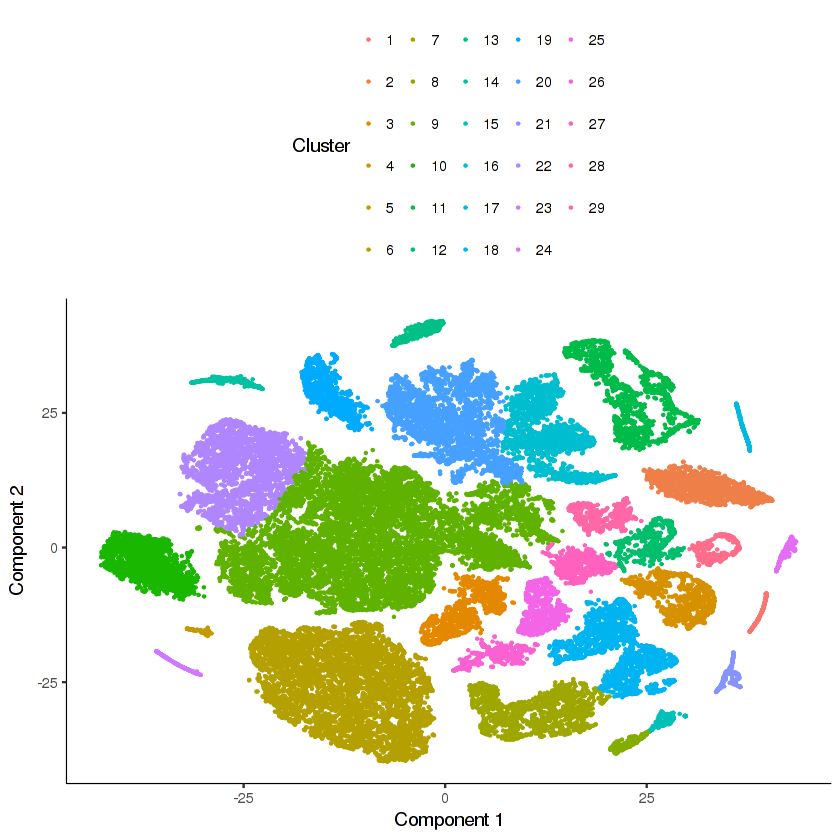

In [147]:
plot_cell_clusters(cds, cell_size = 0.1)

In [ ]:
save.image("RData/L2.experiment.1.RData")

In [33]:
head(cluster.markers %>% filter(cluster == 11), 30)

gene_id        cluster score     symbol    num_cells_expressed rank
1  WBGene00012942 11      6.0860576 Y47D3B.6    756                1  
2  WBGene00000031 11      4.7729860 abu-8       521                2  
3  WBGene00004008 11      4.4996270 pgp-14      729                3  
4  WBGene00044011 11      4.3526767 T06E4.12    566                4  
5  WBGene00004174 11      3.8159660 abu-14      727                5  
6  WBGene00018292 11      3.1833952 F41E6.11    339                6  
7  WBGene00010987 11      2.7562388 R03C1.1     474                7  
8  WBGene00011537 11      2.7404377 T06E4.10    517                8  
9  WBGene00077691 11      2.5508245 T06E4.14    495                9  
10 WBGene00004156 11      2.1310419 pqn-74      647               10  
11 WBGene00017937 11      2.0715244 F30H5.3     440               11  
12 WBGene00014039 11      1.7354876 ZK662.2     602               12  
13 WBGene00004123 11      1.6153993 pqn-36      554               13  
14 WBGene00020803 11      1.5743164 T25E4.1     485               14  
15 WBGene00002348 11      1.5606221 myo-1       461               15  
16 WBGene00003514 11      1.4979444 myo-2       610               16  
17 WBGene00008449 11      1.3641618 E01G6.1     571               17  
18 WBGene00006436 11      1.3569636 ttn-1     16646               18  
19 WBGene00011535 11      1.2935835 T06E4.8     361               19  
20 WBGene00002978 11      1.2320850 lev-11    12029               20  
21 WBGene00010573 11      1.1757516 K04H4.2     571               21  
22 WBGene00011536 11      1.0634141 T06E4.9     374               22  
23 WBGene00000497 11      1.0102171 chs-2       762               23  
24 WBGene00013515 11      0.9917825 Y73F4A.2    419               24  
25 WBGene00007687 11      0.9348741 C18E9.7     460               25  
26 WBGene00000066 11      0.9154482 act-4     18319               26  
27 WBGene00004146 11      0.8890753 pqn-63      289               27  
28 WBGene00006759 11      0.8096233 unc-22    14754               28  
29 WBGene00006820 11      0.8088642 unc-89    15476               29  
30 WBGene00022287 11      0.7457185 Y75B7AR.1   378               30

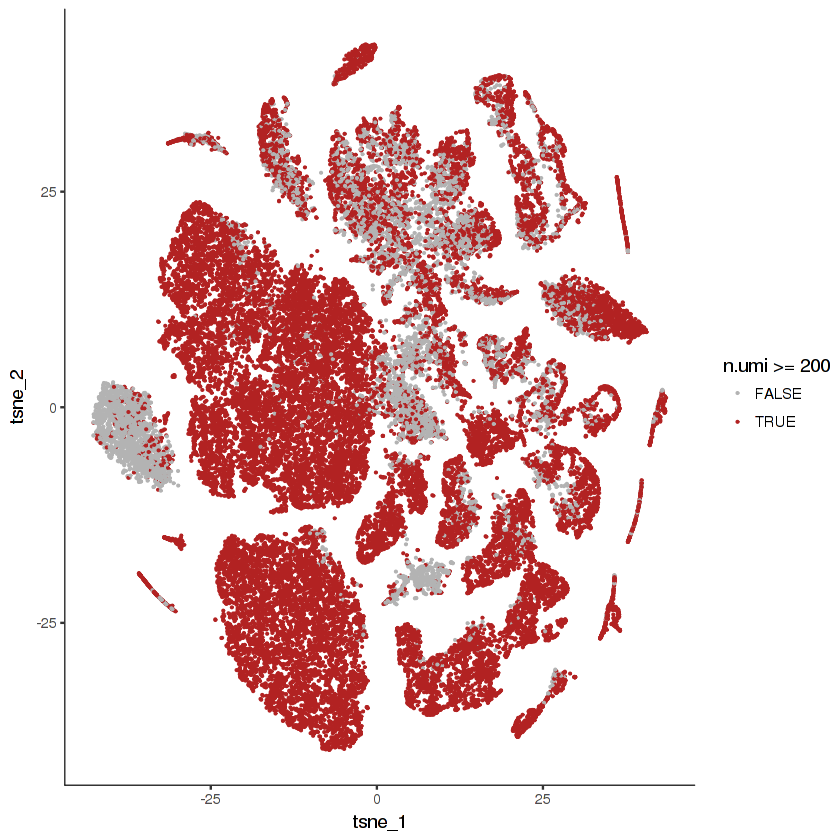

In [17]:
ggplot(pData(cds), aes(x = tsne_1, y = tsne_2, color = n.umi >= 200)) +
    geom_point(size = 0.1) +
    scale_color_manual(values = c("grey70", "firebrick")) +
    monocle:::monocle_theme_opts()

In [4]:
# ttn-1, unc-54, lev-11, myo-3
cds = set.cluster.name(cds, "Body wall muscle", pData(cds)$Cluster %in% c(9, 22))
cds = set.tissue(cds, "Body wall muscle", with(pData(cds), Cluster %in% c(9, 22) & n.umi >= 200 &
    expresses.gene(cds, "ttn-1") + expresses.gene(cds, "unc-54") +
    expresses.gene(cds, "lev-11") + expresses.gene(cds, "myo-3") >= 2))
cds = set.cell.type(cds, "Body wall muscle", with(pData(cds), Cluster %in% c(9, 22) & n.umi >= 200 &
    expresses.gene(cds, "ttn-1") + expresses.gene(cds, "unc-54") +
    expresses.gene(cds, "lev-11") + expresses.gene(cds, "myo-3") >= 2))

In [5]:
# exp-1, glb-26
cds = set.cluster.name(cds, "Intestinal/rectal muscle", pData(cds)$Cluster == 13)
cds = set.tissue(cds, "Intestinal/rectal muscle", pData(cds)$Cluster == 13)
cds = set.cell.type(cds, "Intestinal/rectal muscle", pData(cds)$Cluster == 13)

In [6]:
cds = set.cluster.name(cds, "Hypodermis", pData(cds)$Cluster %in% c(4, 7, 18, 25))
cds = set.tissue(cds, "Hypodermis", pData(cds)$Cluster %in% c(4, 7, 18, 25))

# grd-13, grd-10, grd-3, bah-1, nhr-73, ceh-16
cds = set.cell.type(cds, "Seam cells", pData(cds)$Cluster %in% c(7, 18))

# grd-1, grd-12
cds = set.cell.type(cds, "Rectum",
    pData(cds)$Cluster == 25 & (expresses.gene(cds, "grd-1") + expresses.gene(cds, "grd-12") > 0))

cds = set.cell.type(cds, "Non-seam hypodermis",
    with(pData(cds), Cluster == 25 & is.na(cell.type)) |
    with(pData(cds), Cluster == 4 &
        (expresses.gene(cds, "qua-1") + expresses.gene(cds, "sqt-1") +
         expresses.gene(cds, "dpy-5") + expresses.gene(cds, "col-12") > 0)))

#cds = set.hard.assignment(cds, "Tail hypodermis"
#    pData(cds)$Cluster == 25 & expresses.gene(cds, "lin-44"))

In [7]:
cds = set.cluster.name(cds, "Pharynx", pData(cds)$Cluster %in% c(11, 21))
cds = set.tissue(cds, "Pharynx", pData(cds)$Cluster %in% c(11, 21))

cds = set.cell.type(cds, "Pharyngeal muscle",
    pData(cds)$Cluster == 11 &
    expresses.gene(cds, "myo-2") + expresses.gene(cds, "myo-1") +
    expresses.gene(cds, "myo-5") + expresses.gene(cds, "tnt-4") +
    expresses.gene(cds, "mlc-1") + expresses.gene(cds, "mlc-2") >= 2)

cds = set.cell.type(cds, "Pharyngeal epithelia",
    pData(cds)$Cluster == 11 &
    (expresses.gene(cds, "ajm-1") + expresses.gene(cds, "sma-1") +
     expresses.gene(cds, "nas-15") + expresses.gene(cds, "nas-1") +
     expresses.gene(cds, "ifa-1") > 0) &
    (expresses.gene(cds, "myo-2") + expresses.gene(cds, "myo-1") +
     expresses.gene(cds, "myo-5") + expresses.gene(cds, "tnt-4") +
     expresses.gene(cds, "mlc-1") + expresses.gene(cds, "mlc-2") == 0))

cds = set.cell.type(cds, "Pharyngeal gland", pData(cds)$Cluster == 21)

In [8]:
cds = set.cluster.name(cds, "Neurons", pData(cds)$Cluster %in% c(1, 14, 16, 19, 20, 23, 24))
cds = set.tissue(cds, "Neurons", pData(cds)$Cluster %in% c(1, 14, 16, 19, 20, 23, 24))

# 1 canal associated neurons
# 14 touch receptor neurons
# 19 ciliated sensory neurons
# 23 includes PVD tail interneuron
# 24 flp-1(+) interneurons

In [9]:
cds = set.cluster.name(cds, "Glia and excretory cells", pData(cds)$Cluster %in% c(8, 12, 15, 28, 29))

# vap-1 in amphid but not phasmid sheath cells; fig-1 in both
cds = set.cell.type(cds, "Am/PH sheath cells", pData(cds)$Cluster %in% c(8, 15))

cds = set.cell.type(cds, "Socket cells",
    pData(cds)$Cluster %in% c(12, 28, 29) &
    expresses.gene(cds, "grl-1") + expresses.gene(cds, "grl-2") +
    expresses.gene(cds, "grd-15") + expresses.gene(cds, "daf-6") +
    expresses.gene(cds, "ram-5") > 0 & !expresses.gene(cds, "kcc-3"))

cds = set.cell.type(cds, "Unclassified glia",
    pData(cds)$Cluster %in% c(12, 28) &
    expresses.gene(cds, "kcc-3") > 0)

cds = set.tissue(cds, "Glia",
    with(pData(cds), !is.na(cell.type) & cell.type %in% c(
        "Am/PH sheath cells", "Socket cells", "Unclassified glia")))

In [10]:
cds = set.cluster.name(cds, "Gonad/vulval precursors", pData(cds)$Cluster %in% c(3, 5, 27))

cds = set.tissue(cds, "Gonad", pData(cds)$Cluster == 5  | (pData(cds)$Cluster == 3 &
    !expresses.gene(cds, "egl-15") &
    expresses.gene(cds, "lin-12") + expresses.gene(cds, "dgn-1")
    + expresses.gene(cds, "inx-9") + expresses.gene(cds, "cle-1") >= 2))

cds = set.cell.type(cds, "Sex myoblasts",
    pData(cds)$Cluster == 3 & expresses.gene(cds, "egl-15"))

cds = set.cell.type(cds, "Somatic gonad precursors",
    pData(cds)$Cluster == 3 & !expresses.gene(cds, "egl-15") &
    expresses.gene(cds, "lin-12") + expresses.gene(cds, "dgn-1")
    + expresses.gene(cds, "inx-9") + expresses.gene(cds, "cle-1") >= 2)

# mig-6, nid-1
cds = set.cell.type(cds, "Distal tip cells", pData(cds)$Cluster == 5)

cds = set.cell.type(cds, "Vulval precursors",
    pData(cds)$Cluster == 27 & (expresses.gene(cds, "let-23") + expresses.gene(cds, "osm-11") > 0))

In [11]:
# pgl-1, cgh-1, gld-1, iff-2
cds = set.cluster.name(cds, "Germline", pData(cds)$Cluster == 6)
cds = set.tissue(cds, "Gonad", pData(cds)$Cluster == 6)
cds = set.cell.type(cds, "Germline", pData(cds)$Cluster == 6)

In [14]:
# cup-4, lgc-26, unc-122
cds = set.cluster.name(cds, "Coelomocytes", pData(cds)$Cluster == 2)
cds = set.tissue(cds, "Coelomocytes", pData(cds)$Cluster == 2)
cds = set.cell.type(cds, "Coelomocytes", pData(cds)$Cluster == 2)

In [15]:
# 10, 26, 30 low coverage; 17 unclear
cds = set.cluster.name(cds, "Low coverage or unclear", pData(cds)$Cluster %in% c(10, 17, 26, 30))

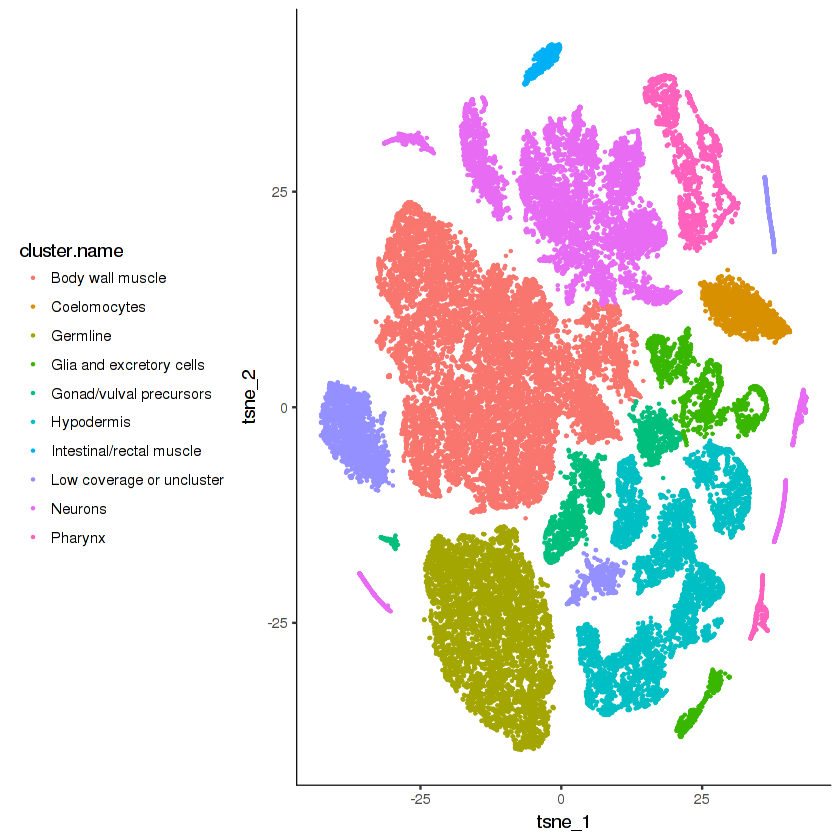

In [360]:
plot.clusters(cds)

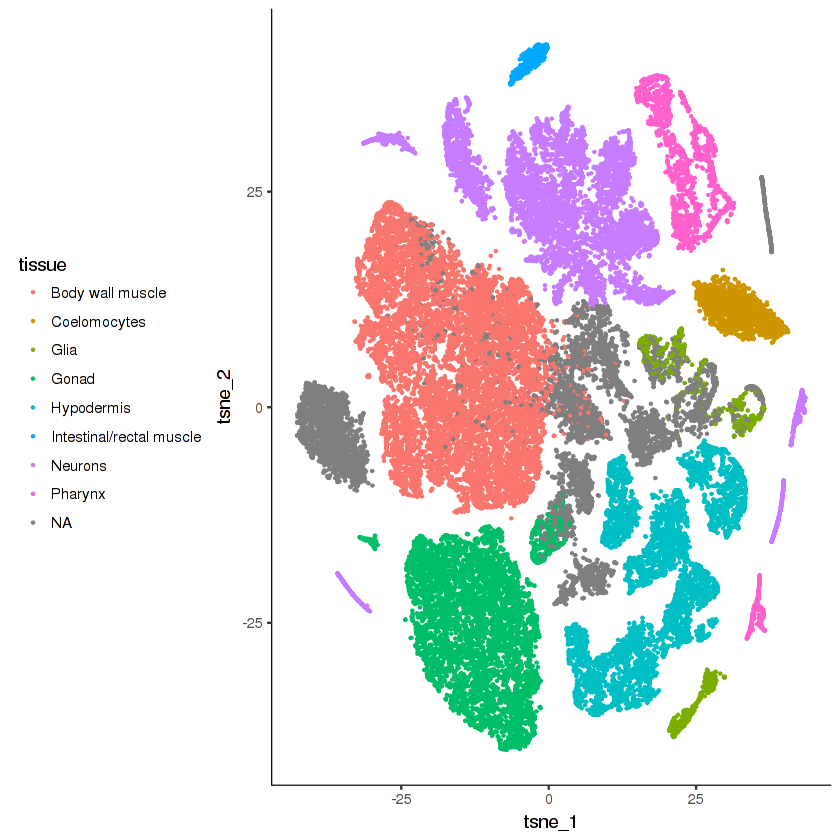

In [16]:
plot.tissues(cds)

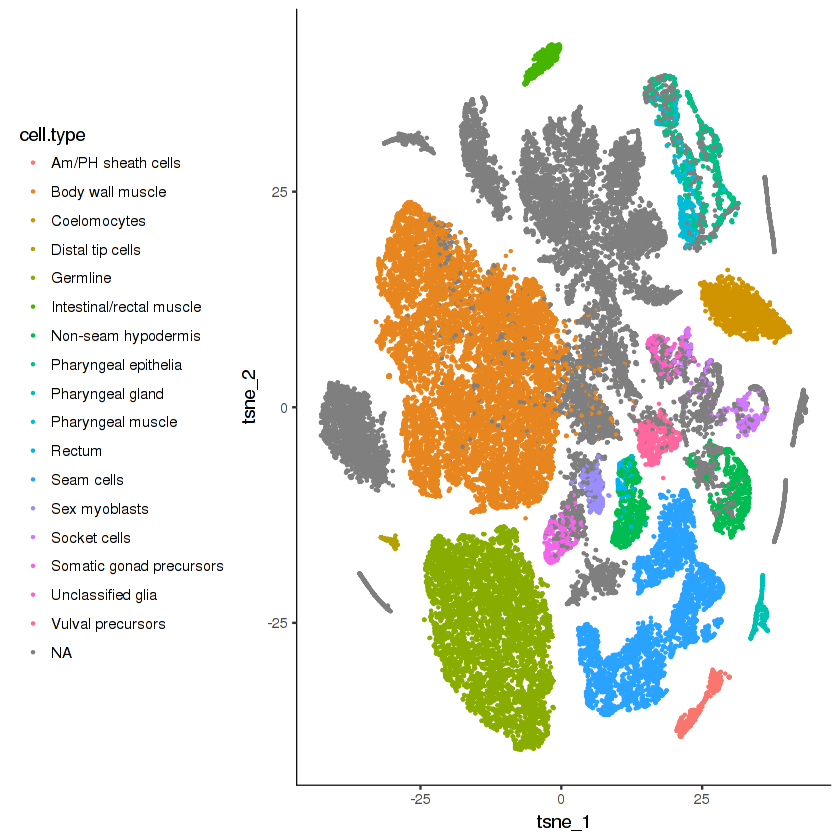

In [362]:
plot.cell.types(cds)

In [55]:
save.image("RData/L2.experiment.1.RData")

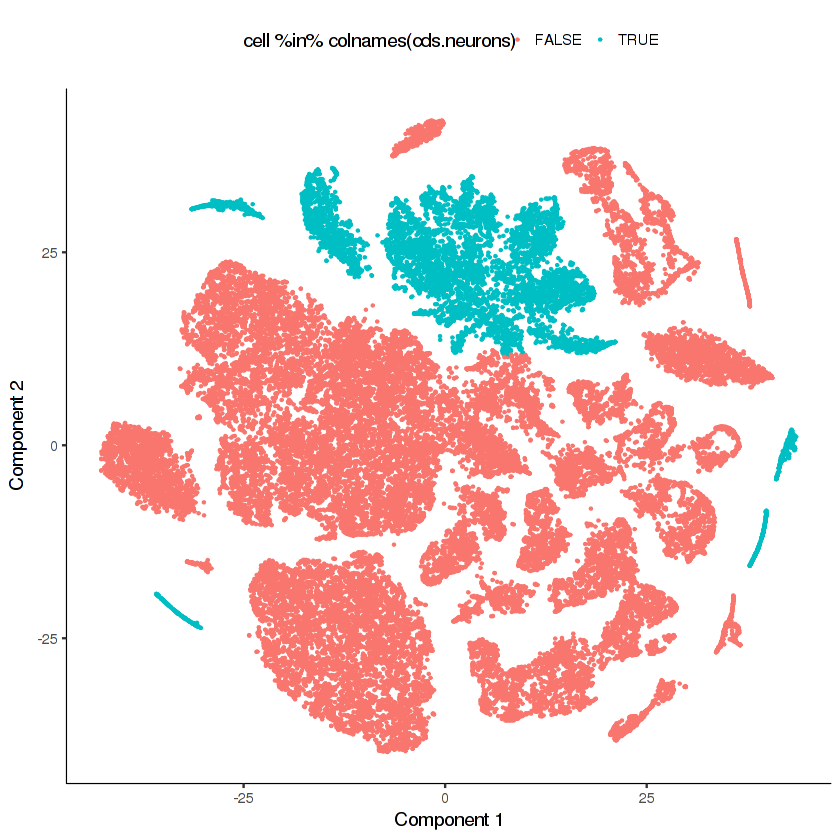

In [211]:
cds.neurons = cds[, with(pData(cds), !is.na(tissue) & tissue == "Neurons")]
plot_cell_clusters(cds, color = "cell %in% colnames(cds.neurons)", cell_size = 0.1)

In [ ]:
set.seed(123)
cds.neurons = reduceDimension(
    cds.neurons, max_components = 2, norm_method = "log",
    num_dim = 40, reduction_method = 'tSNE', verbose = T,
    residualModelFormulaStr = "~ plate")

pData(cds.neurons)$tsne_1 = reducedDimA(cds.neurons)[1,]
pData(cds.neurons)$tsne_2 = reducedDimA(cds.neurons)[2,]

In [ ]:
cds.neurons = clusterCells_Density_Peak(cds.neurons)
plot_cell_clusters(cds.neurons, cell_size = 0.333)

Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

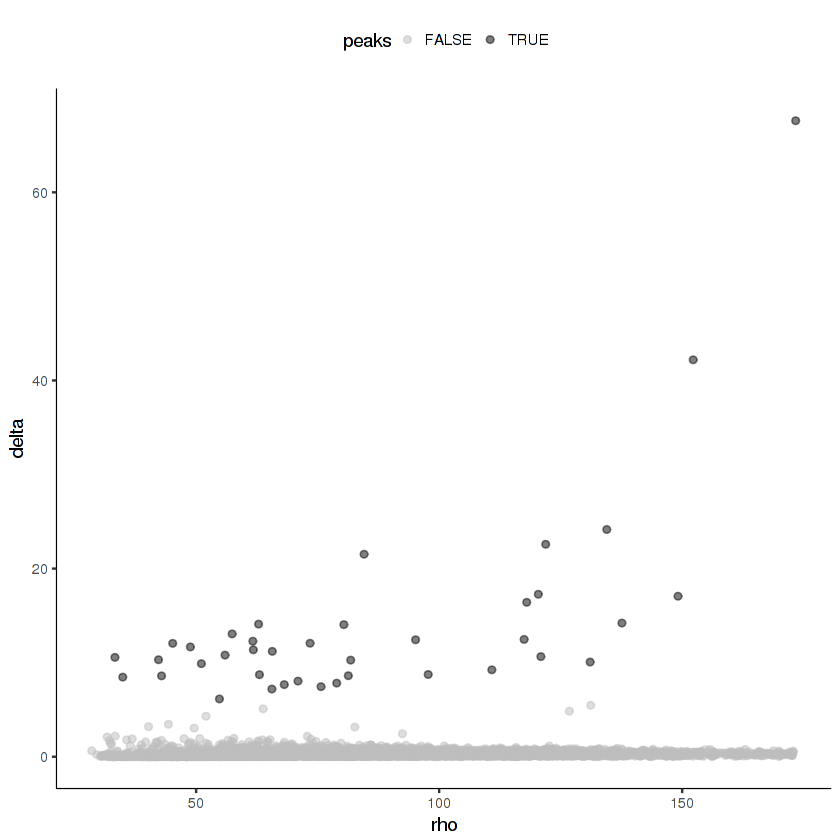

In [5]:
plot_rho_delta(cds.neurons, rho_threshold = 10, delta_threshold = 6)

In [ ]:
cds.neurons = clusterCells_Density_Peak(cds.neurons,
    rho_threshold = 10, delta_threshold = 6, skip_rho_sigma = T)
plot_cell_clusters(cds.neurons, cell_size = 0.333)

In [155]:
pData(cds.neurons)$Cluster = ifelse(pData(cds.neurons)$Cluster == 39,
    ifelse(pData(cds.neurons)$tsne_2 < -31, 40, 39), pData(cds.neurons)$Cluster)

pData(cds.neurons)$Cluster = ifelse(pData(cds.neurons)$Cluster == 20,
    ifelse(pData(cds.neurons)$tsne_2 > -5, 41, 20), pData(cds.neurons)$Cluster)

pData(cds.neurons)$Cluster = factor(pData(cds.neurons)$Cluster)

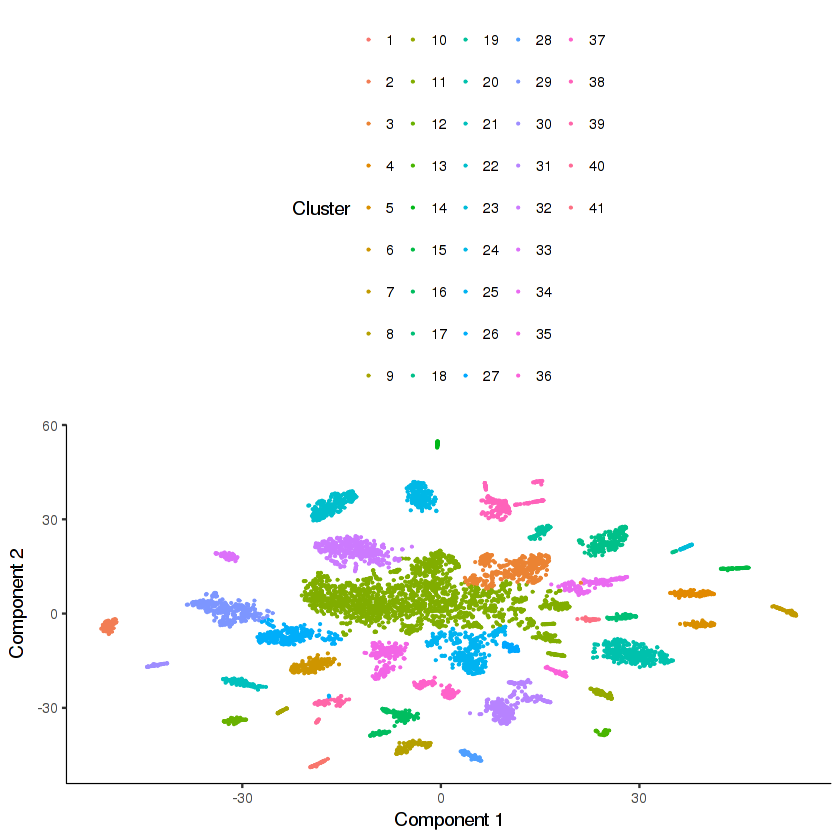

In [3]:
plot_cell_clusters(cds.neurons, cell_size = 0.1)

In [156]:
neuron.markers = get.cluster.markers(cds.neurons)

In [17]:
pData(cds.neurons)$cell.type = rep(NA, ncol(cds.neurons))
pData(cds.neurons)$fine.grained.neuron.type = rep(NA, ncol(cds.neurons))

In [18]:
# odr-10
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "AWA olfactory",
    pData(cds.neurons)$Cluster == 1)

# gcy-15; gcy-11, capa-1
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "ASG sensory",
    pData(cds.neurons)$Cluster == 2)

# glr-3
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "RIA interneurons",
    pData(cds.neurons)$Cluster == 4)

# mec-1, lad-2
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "SDQ/ALN/PLN O2-sensory",
    pData(cds.neurons)$Cluster == 6)

# flp-17
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "BAG O2-sensory",
    pData(cds.neurons)$Cluster == 7)

# ins-6, daf-7, daf-11, daf-28
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "ASI/ASJ sensory",
    pData(cds.neurons)$Cluster == 8)

# gcy-6/7
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "ASEL gustatory",
    pData(cds.neurons)$Cluster == 9)

# nlp-12
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "DVA interneuron",
    pData(cds.neurons)$Cluster == 12)

# gcy-5
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "ASER gustatory",
    pData(cds.neurons)$Cluster == 14)

# gcy-37/32/36/35
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "URX/AQR/PQR O2-sensory",
    pData(cds.neurons)$Cluster == 19)

# flp-18, nmr-2, dbl-1; nmr-1, glr-1, glr-2; not flp-1(+)
#cds.neurons = set.fine.grained.neuron.type(cds.neurons, "RIM motor neurons",
#    pData(cds.neurons)$Cluster == 24)


# flp-12, lad-2, ast-1, lim-4; unc-8; no/little expression of ceh-24, ceh-17
#cds.neurons = set.fine.grained.neuron.type(cds.neurons, "SAA motor/interneurons",
#    pData(cds.neurons)$Cluster == 26)

# zig-4, snet-1
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "ASK sensory",
    pData(cds.neurons)$Cluster == 28)

# ceh-24, ceh-17 (SIA)
#cds.neurons = set.fine.grained.neuron.type(cds.neurons, "Sublateral motor neurons",
#    pData(cds.neurons)$Cluster == 29)

# tbh-1
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "RIC interneurons",
    pData(cds.neurons)$Cluster == 30)

# daf-11 but not ASI/ASJ (daf-7/ins-6) or ASK (zig-4, snet-1); oig-8
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "AWB/AWC sensory",
    pData(cds.neurons)$Cluster == 39)

# gcy-8, dac-1, but not daf-11
cds.neurons = set.fine.grained.neuron.type(cds.neurons, "AFD thermosensory",
    pData(cds.neurons)$Cluster == 40)

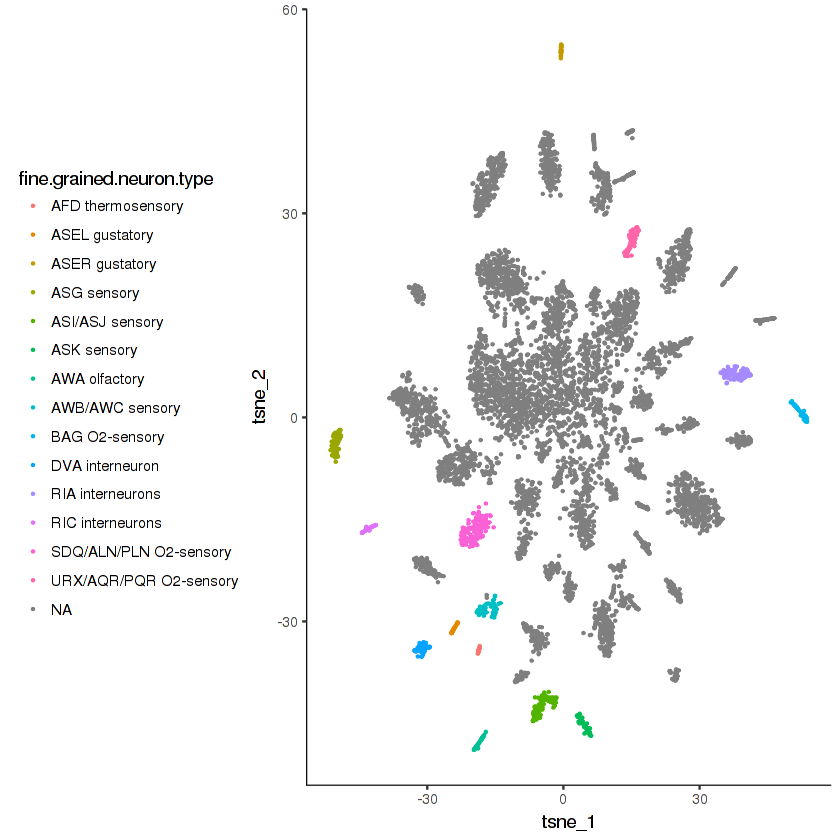

In [365]:
plot.fine.grained.neuron.types(cds.neurons)

In [19]:
#  1 AWA
#  2 ASG
#  8 ASI/ASJ
#  9 ASEL
# 14 ASER
# 15 ???
# 16 ???
# 21 ???
# 28 ???
# 39 AWB/AWC
# 40 AFD

# R102.2, dyf-2, che-3, nphp-4
cds.neurons = set.cell.type(cds.neurons, "Ciliated sensory neurons", with(pData(cds.neurons),
    fine.grained.neuron.type %in% c(
        "AWA olfactory", "ASG sensory", "ASI/ASJ sensory", "ASEL gustatory", "ASER gustatory",
        "AWB/AWC sensory", "AFD thermosensory") |
    Cluster %in% c(15, 16, 21, 28)))

cds.neurons = set.cell.type(cds.neurons, "Oxygen sensory neurons", with(pData(cds.neurons),
    fine.grained.neuron.type %in% c(
        "BAG O2-sensory", "URX/AQR/PQR O2-sensory", "SDQ/ALN/PLN O2-sensory")))

# 18 des-2 and deg-3 = PVC/PVD
cds.neurons = set.cell.type(cds.neurons, "Other interneurons", with(pData(cds.neurons),
    fine.grained.neuron.type %in% c(
        "RIA interneurons", "RIC interneurons", "DVA interneuron") |
    Cluster %in% c(18)))

# mec-17, mec-7
cds.neurons = set.cell.type(cds.neurons, "Touch receptor neurons",
    pData(cds.neurons)$Cluster == 20)

# acy-2, ace-3, mig-6, cwn-1
cds.neurons = set.cell.type(cds.neurons, "Canal associated neurons",
    pData(cds.neurons)$Cluster == 22)

# ser-7, eya-1, flr-2, pha-4
cds.neurons = set.cell.type(cds.neurons, "Pharyngeal neurons",
    pData(cds.neurons)$Cluster %in% c(33, 38))

# AVK, AVA, AVE, RIG, RMG, AIY, AIA
cds.neurons = set.cell.type(cds.neurons, "flp-1(+) interneurons",
    pData(cds.neurons)$Cluster == 31 & expresses.gene(cds.neurons, "flp-1"))

# unc-25; unc-25(+) snf-11(+) = RME/RIS/AVL/DVB (non-VD/DD GABAergic)
cds.neurons = set.cell.type(cds.neurons, "GABAergic neurons",
    pData(cds.neurons)$Cluster == 32 | (
        pData(cds.neurons)$Cluster %in% c(3, 11) &
        expresses.gene(cds.neurons, "unc-25") & expresses.gene(cds.neurons, "snf-11")))

# dat-1, cat-2
cds.neurons = set.cell.type(cds.neurons, "Dopaminergic neurons",
    pData(cds.neurons)$Cluster == 34 &
    expresses.gene(cds.neurons, "dat-1") + expresses.gene(cds.neurons, "cat-2") > 0)

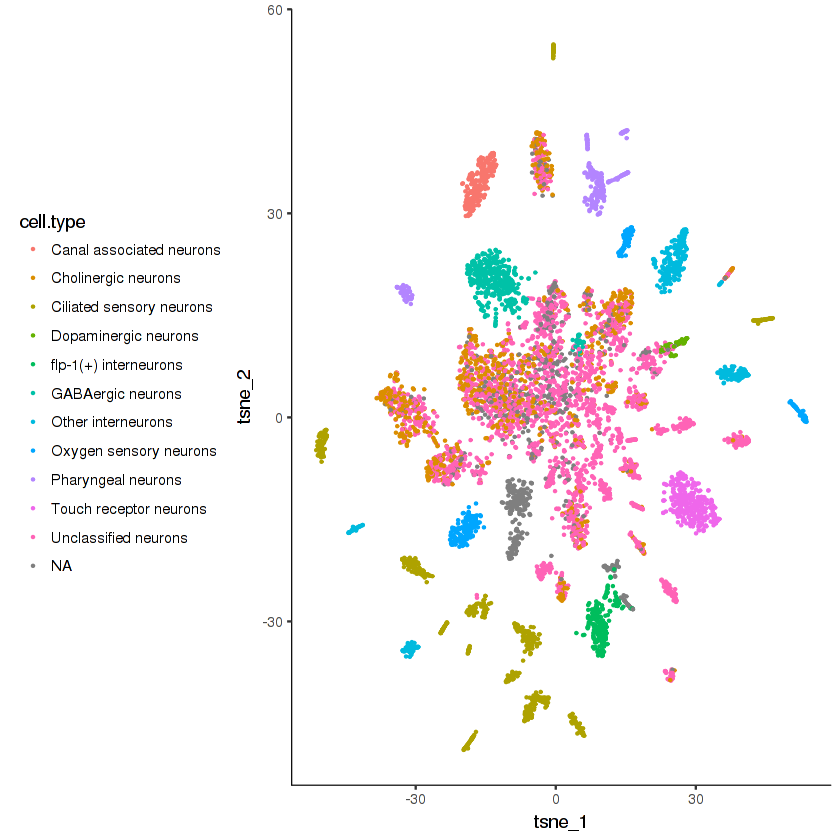

In [7]:
plot.cell.types(cds.neurons)

In [20]:
#  1 AWA
#  2 ASG
#  3 ???
#  4 RIA
#  5 ???
#  6 SDQ/ALN/PLN
#  7 BAG
#  8 ASI/ASJ
#  9 ASEL
# 10 ???
# 11 ???
# 12 DVA
# 13 ???
# 14 ASER
# 15 ??? (CSN)
# 16 ??? (CSN)
# 17 ???
# 18 PVC/PVD
# 19 URX/AQR/PQR
# 20 ALM/PLM/AVM/PVM (touch receptor)
# 21 ??? (CSN)
# 22 CAN
# 23 ???
# 24 ???
# 25 ???
# 26 ??? (cholinergic, probably SAA)
# 27 ???
# 28 ??? (CSN)
# 29 ???
# 30 RIC
# 31 AVK/AVA/AVE/RIG/RMG/AIY/AIA
# 32 GABAergic
# 33 Pharyngeal
# 34 Dopaminergic
# 35 Doublets (BWM)
# 36 ???
# 37 ???
# 38 Pharyngeal
# 39 AWB/AWC
# 40 AFD
# 41 ???

cds.neurons = set.cell.type(cds.neurons, "Cholinergic neurons",
    pData(cds.neurons)$Cluster %in% c(3, 5, 10, 11, 13, 17, 23, 24, 25, 26, 27, 29, 36, 37, 41) &
    expresses.gene(cds.neurons, "unc-17") +
    expresses.gene(cds.neurons, "cho-1") +
    expresses.gene(cds.neurons, "cha-1") +
    expresses.gene(cds.neurons, "acr-18") +
    expresses.gene(cds.neurons, "acr-15") > 0)

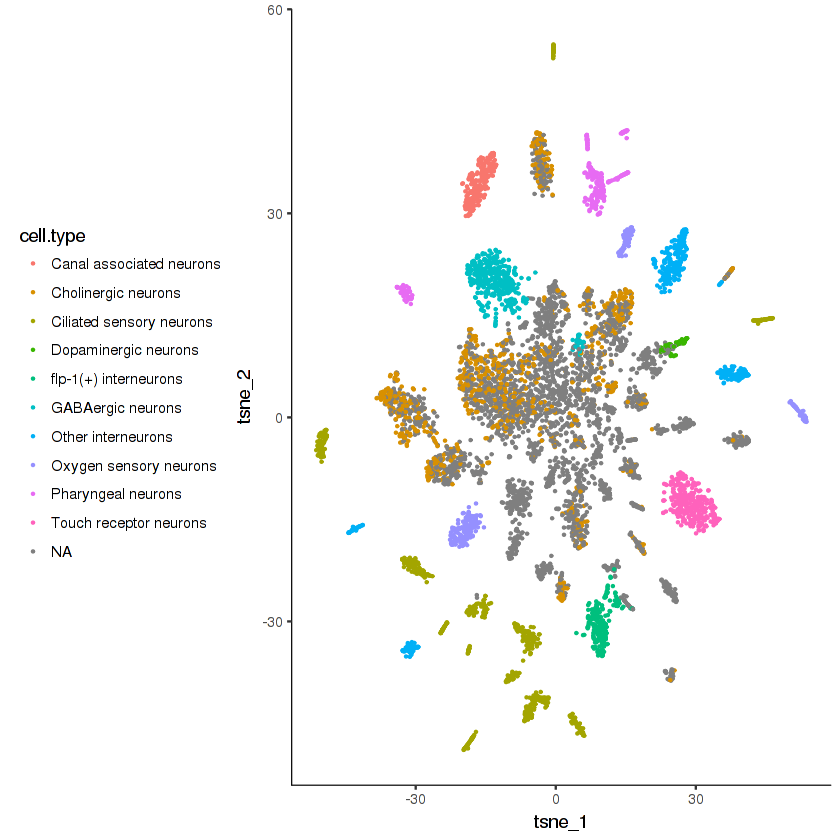

In [21]:
plot.cell.types(cds.neurons)

In [22]:
cds.neurons = set.cell.type(cds.neurons, "Unclassified neurons",
    is.na(pData(cds.neurons)$cell.type) &
    pData(cds.neurons)$Cluster %in% c(3, 5, 10, 11, 13, 17, 23, 24, 25, 26, 27, 29, 34, 36, 37, 41) &
    expresses.gene(cds.neurons, "egl-21") +
    expresses.gene(cds.neurons, "sbt-1") +
    expresses.gene(cds.neurons, "ida-1") +
    expresses.gene(cds.neurons, "casy-1") +
    expresses.gene(cds.neurons, "unc-104") +
    expresses.gene(cds.neurons, "unc-41") > 0)

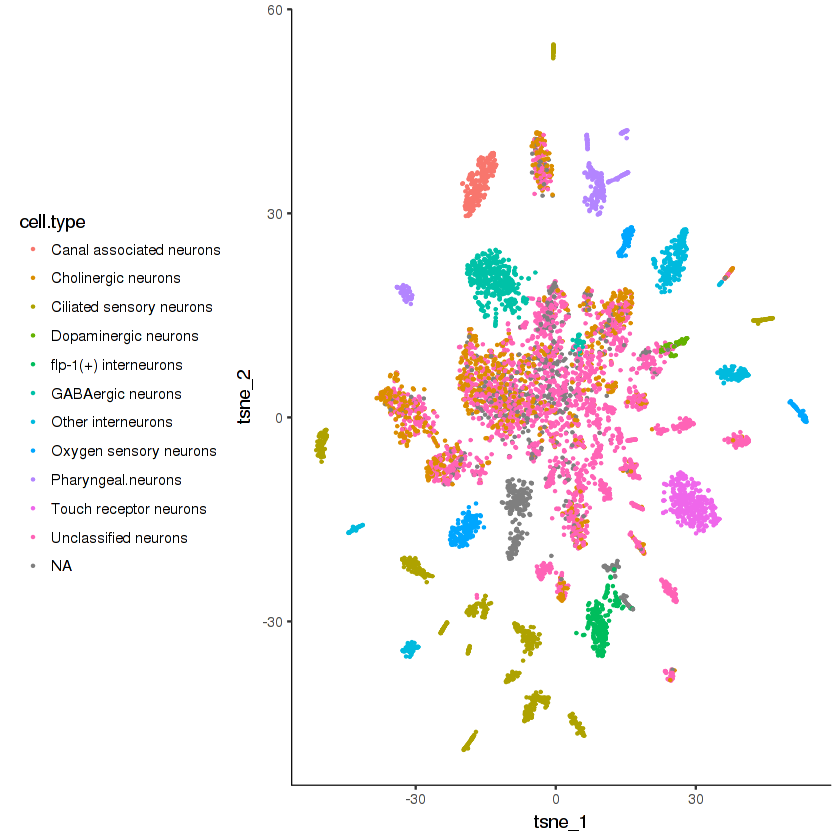

In [371]:
plot.cell.types(cds.neurons)

In [23]:
cds = set.tissue(cds, NA, pData(cds)$cell %in% pData(cds.neurons)$cell[pData(cds.neurons)$Cluster == 35])

In [24]:
tmp.df = left_join(
    pData(cds)[, c("cell", "n.umi")],
    pData(cds.neurons)[, c("cell", "cell.type", "fine.grained.neuron.type")],
    by = "cell")

pData(cds)$cell.type = with(pData(cds),
    ifelse(!is.na(tissue) & tissue == "Neurons", tmp.df$cell.type, cell.type))

pData(cds)$fine.grained.neuron.type = with(pData(cds),
    ifelse(!is.na(tissue) & tissue == "Neurons", tmp.df$fine.grained.neuron.type, NA))

rm(tmp.df)

In [374]:
pData(cds) %>% group_by(cell.type) %>% summarize(n = n()) %>% arrange(-n)

cell.type                n    
1  Body wall muscle         10843
2  NA                        8354
3  Germline                  5410
4  Seam cells                3620
5  Unclassified neurons      2639
6  Coelomocytes              1397
7  Non-seam hypodermis       1308
8  Cholinergic neurons       1015
9  Ciliated sensory neurons   842
10 Pharyngeal epithelia       750
11 Vulval precursors          524
12 Other interneurons         443
13 Socket cells               443
14 Am/PH sheath cells         431
15 GABAergic neurons          400
16 Somatic gonad precursors   372
17 Pharyngeal muscle          348
18 Intestinal/rectal muscle   346
19 Touch receptor neurons     334
20 Sex myoblasts              315
21 Pharyngeal.neurons         314
22 Oxygen sensory neurons     305
23 Pharyngeal gland           281
24 Canal associated neurons   239
25 flp-1(+) interneurons      224
26 Unclassified glia          213
27 Distal tip cells           131
28 Rectum                     124
29 Dopaminergic neurons        70

In [174]:
save.image("RData/L2.experiment.1.RData")

In [ ]:
# now purge the doublets
# BWM and IRM
# Pharynx
# Hypodermis
# Glia
# Gonad, Sex myoblasts, VPCs (by tissue and cell type for those not included in a tissue)

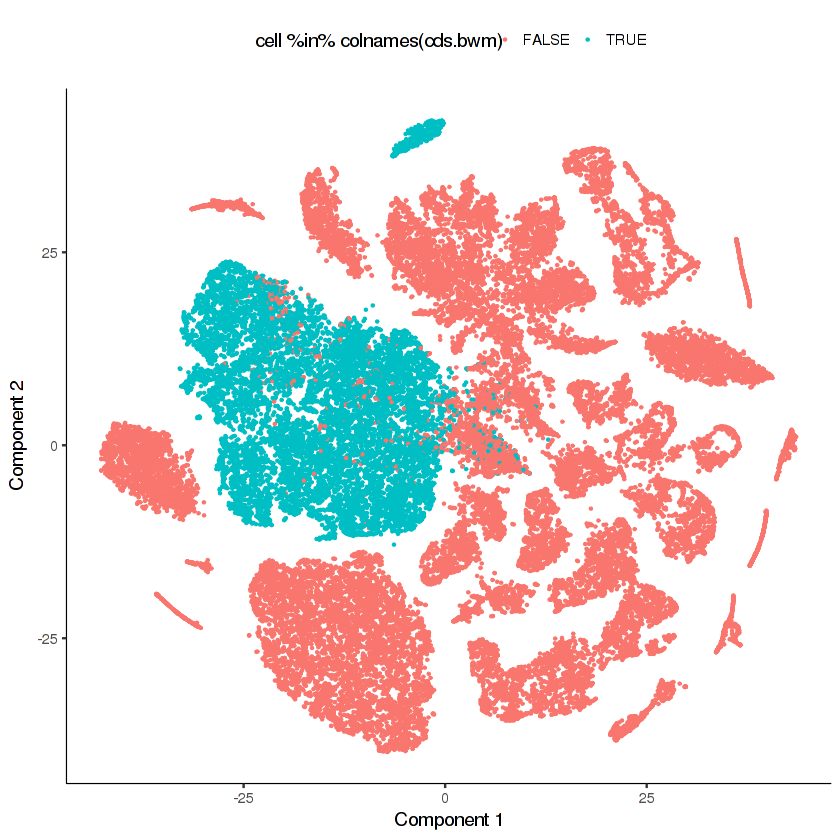

In [3]:
cds.bwm = cds[, with(pData(cds),
    !is.na(tissue) & tissue %in% c("Body wall muscle", "Intestinal/rectal muscle"))]
plot_cell_clusters(cds, color = "cell %in% colnames(cds.bwm)", cell_size = 0.2)

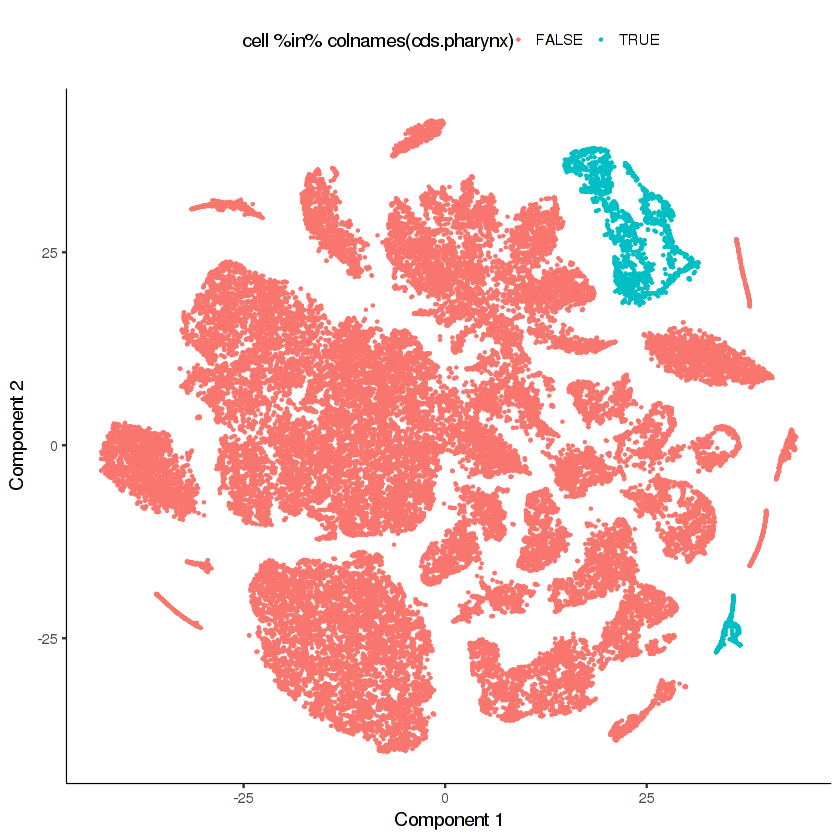

In [4]:
cds.pharynx = cds[, with(pData(cds), !is.na(tissue) & tissue == "Pharynx")]
plot_cell_clusters(cds, color = "cell %in% colnames(cds.pharynx)", cell_size = 0.2)

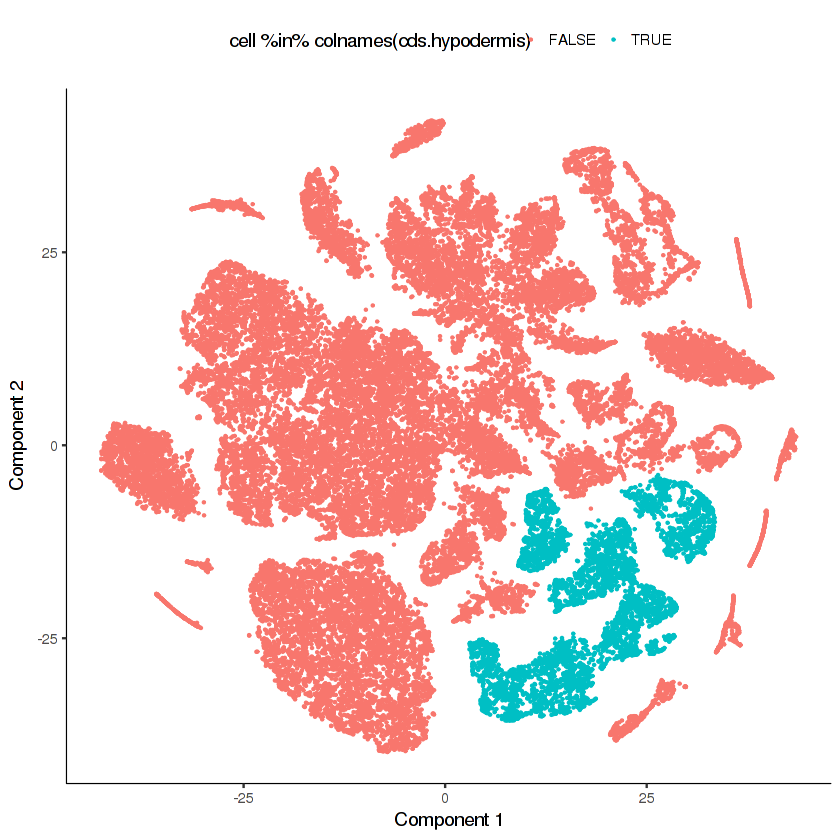

In [5]:
cds.hypodermis = cds[, with(pData(cds), !is.na(tissue) & tissue == "Hypodermis")]
plot_cell_clusters(cds, color = "cell %in% colnames(cds.hypodermis)", cell_size = 0.2)

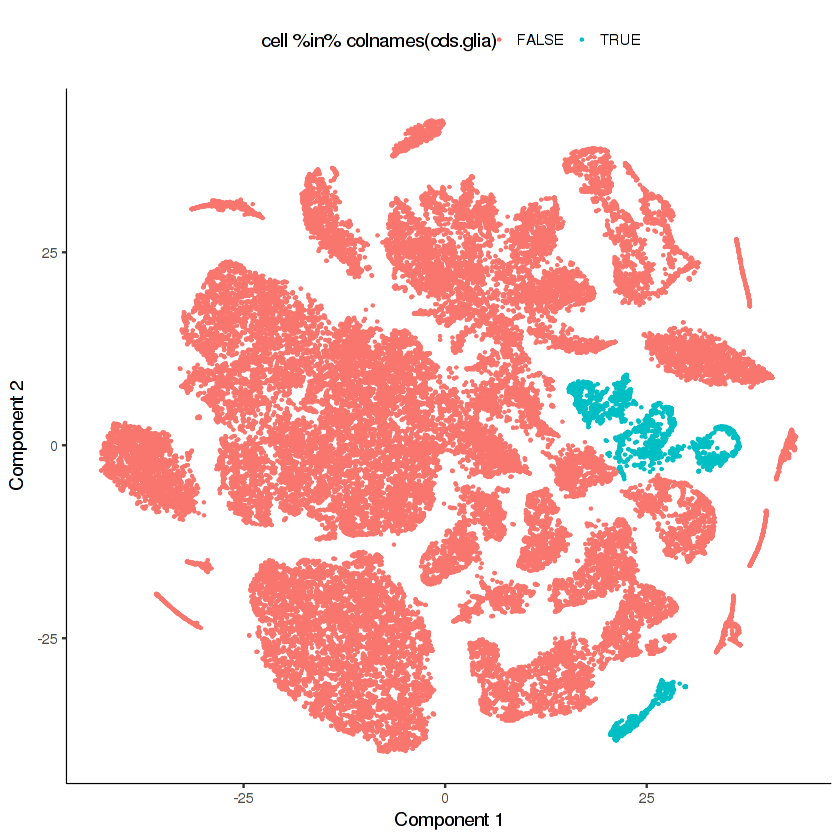

In [6]:
cds.glia = cds[, pData(cds)$Cluster %in% c(8, 12, 15, 28, 29)]
plot_cell_clusters(cds, color = "cell %in% colnames(cds.glia)", cell_size = 0.2)

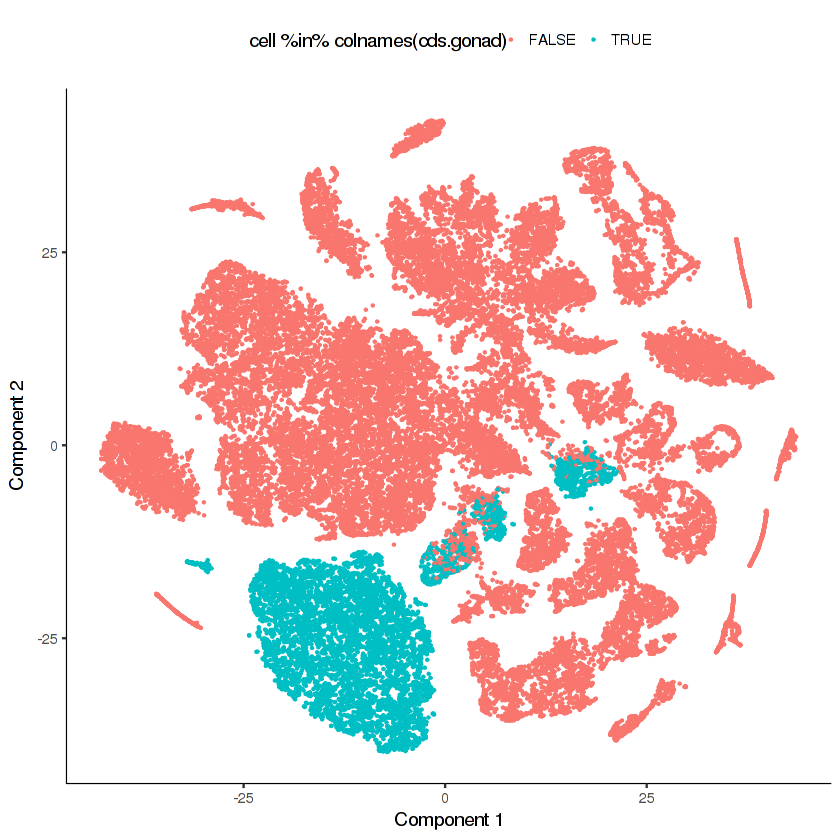

In [7]:
cds.gonad = cds[, with(pData(cds),
    (!is.na(tissue) & tissue == "Gonad") |
    (!is.na(cell.type) & cell.type %in% c("Sex myoblasts", "Vulval precursors")))]
plot_cell_clusters(cds, color = "cell %in% colnames(cds.gonad)", cell_size = 0.2)

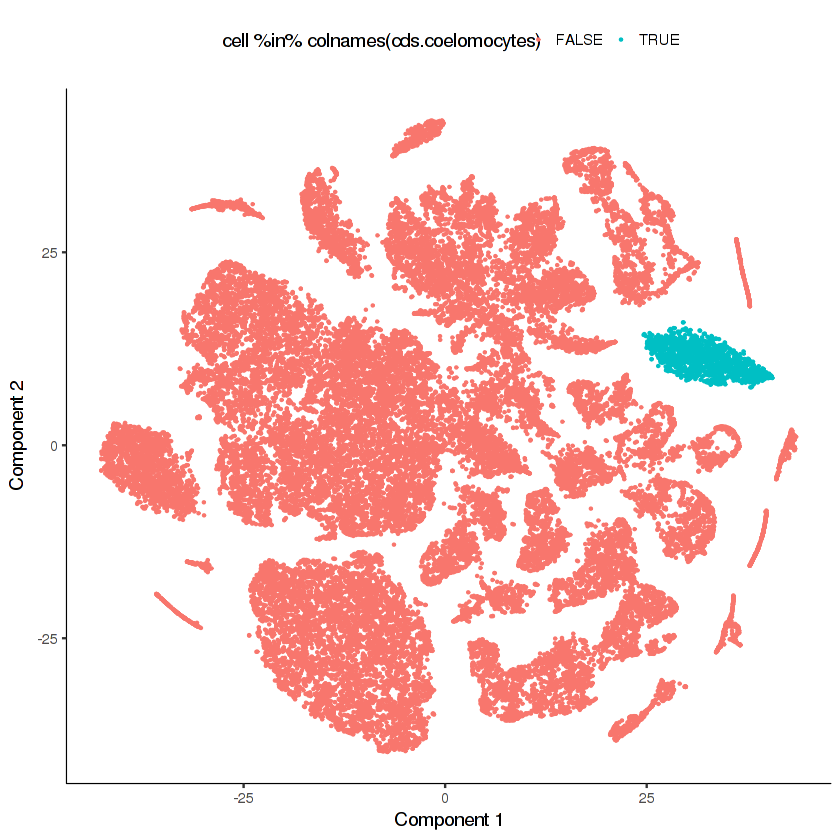

In [81]:
cds.coelomocytes = cds[, with(pData(cds), !is.na(tissue) & tissue == "Coelomocytes")]
plot_cell_clusters(cds, color = "cell %in% colnames(cds.coelomocytes)", cell_size = 0.2)

Removing batch effects
Remove noise by PCA ...
Reduce dimension by tSNE ...
Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

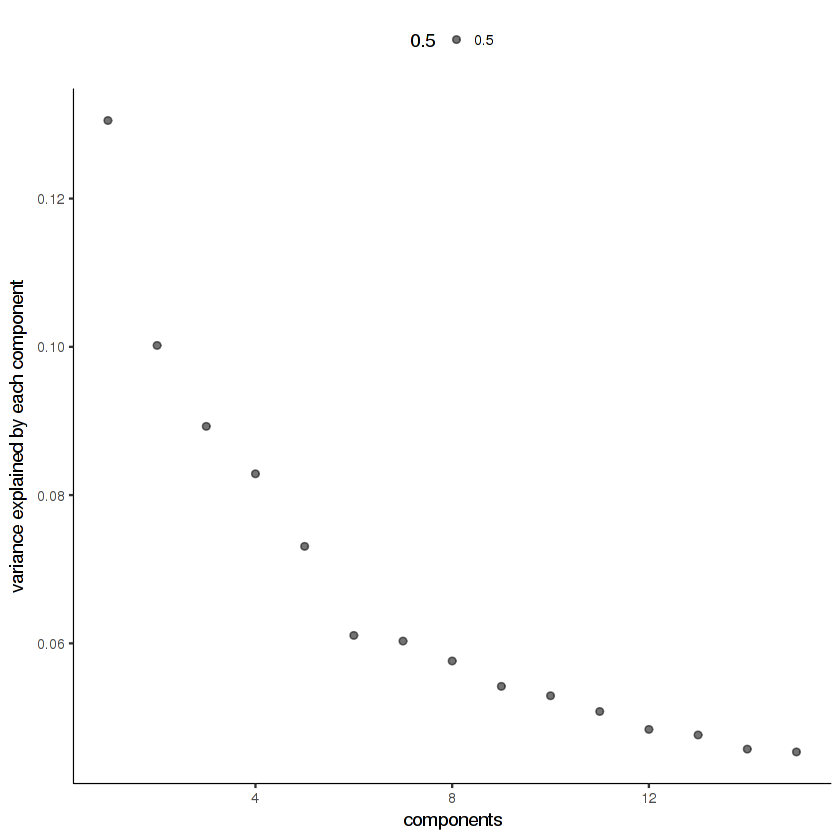

In [21]:
set.seed(42)
cds.bwm = reduceDimension(
    cds.bwm, max_components = 2, norm_method = "log",
    num_dim = 15, reduction_method = 'tSNE', verbose = T,
    residualModelFormulaStr = "~ plate")

pData(cds.bwm)$tsne_1 = reducedDimA(cds.bwm)[1,]
pData(cds.bwm)$tsne_2 = reducedDimA(cds.bwm)[2,]

plot_pc_variance_explained(cds.bwm)

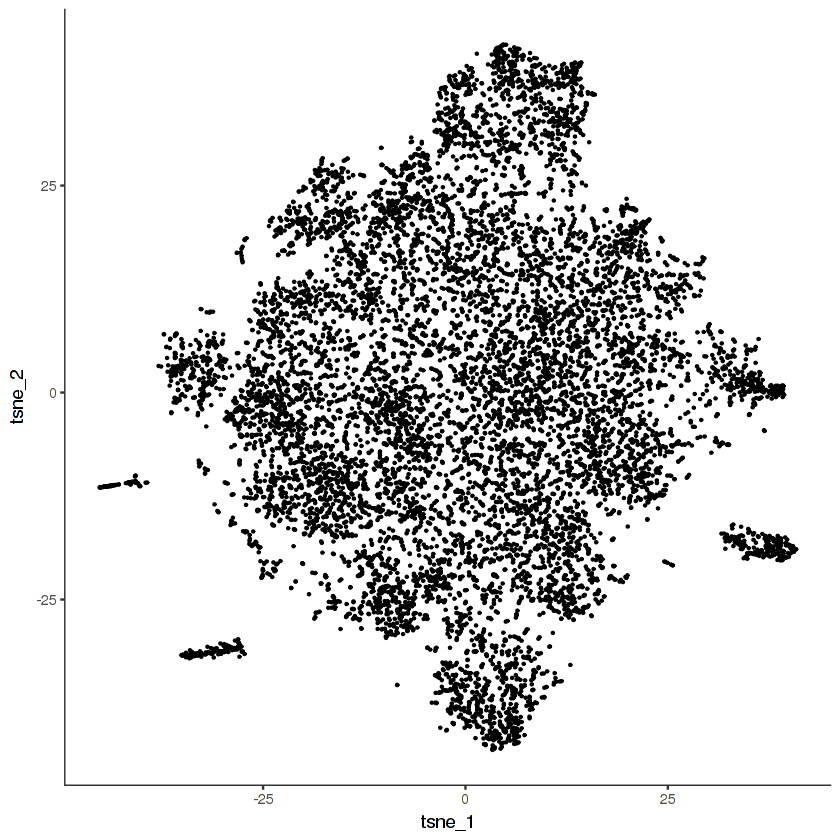

In [22]:
ggplot(pData(cds.bwm), aes(x = tsne_1, y = tsne_2)) +
    geom_point(size = 0.2) +
    monocle:::monocle_theme_opts()

Removing batch effects
Remove noise by PCA ...
Reduce dimension by tSNE ...
Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

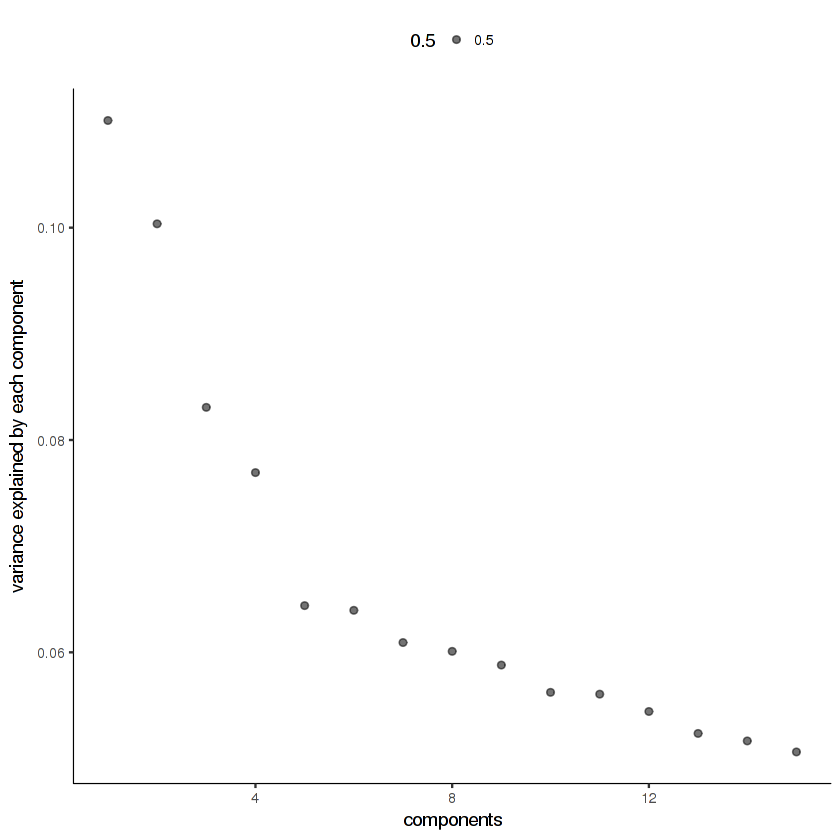

In [8]:
set.seed(42)
cds.pharynx = reduceDimension(
    cds.pharynx, max_components = 2, norm_method = "log",
    num_dim = 15, reduction_method = 'tSNE', verbose = T,
    residualModelFormulaStr = "~ plate")

pData(cds.pharynx)$tsne_1 = reducedDimA(cds.pharynx)[1,]
pData(cds.pharynx)$tsne_2 = reducedDimA(cds.pharynx)[2,]

plot_pc_variance_explained(cds.pharynx)

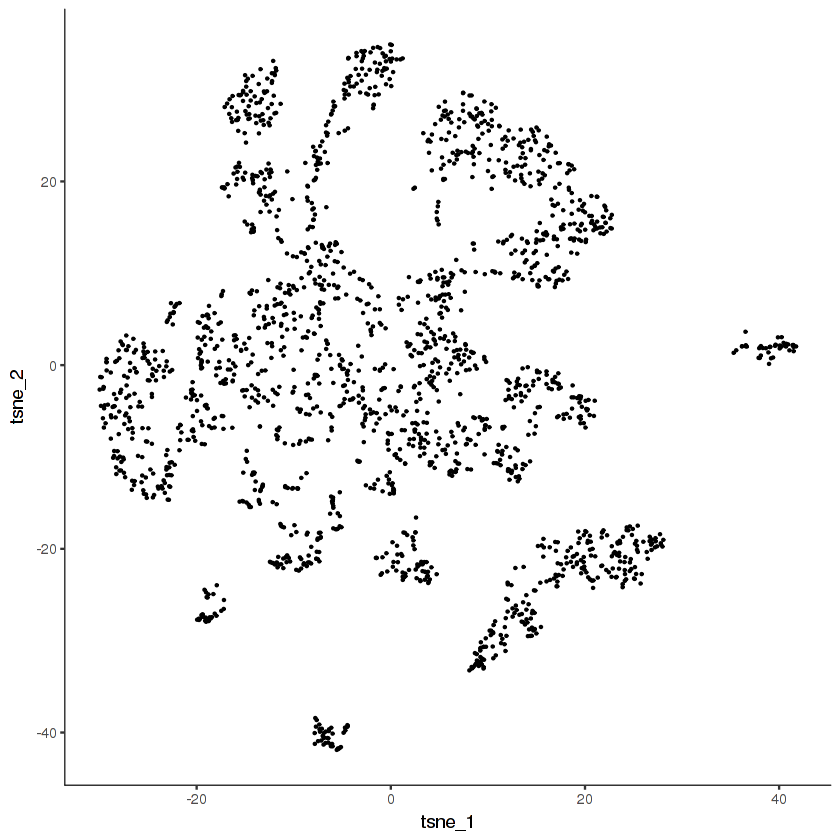

In [9]:
ggplot(pData(cds.pharynx), aes(x = tsne_1, y = tsne_2)) +
    geom_point(size = 0.2) +
    monocle:::monocle_theme_opts()

Removing batch effects
Remove noise by PCA ...
Reduce dimension by tSNE ...
Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

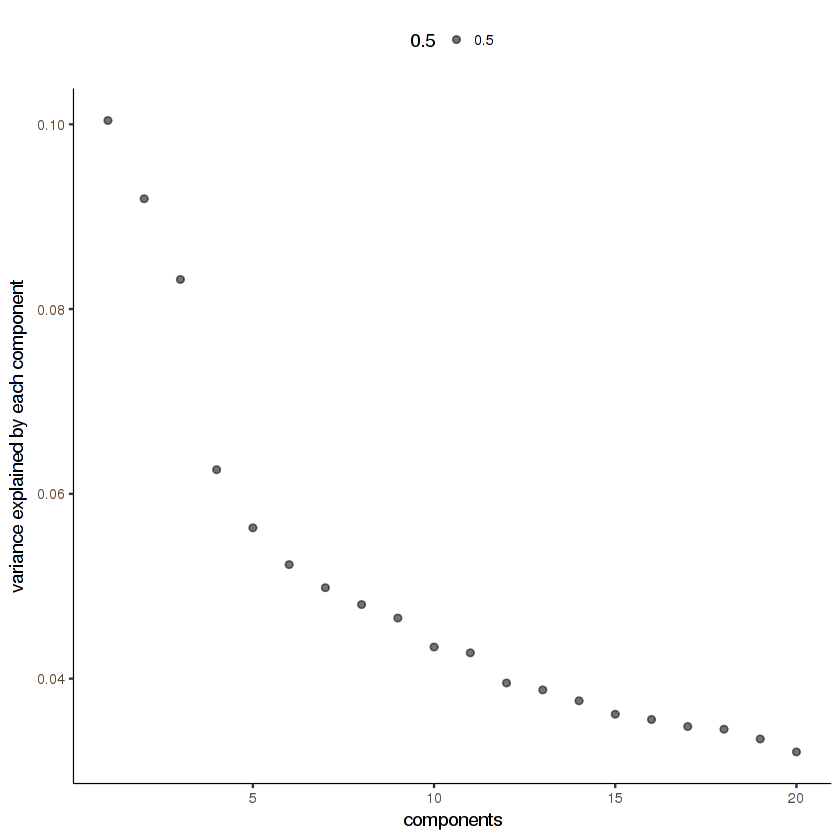

In [15]:
set.seed(42)
cds.hypodermis = reduceDimension(
    cds.hypodermis, max_components = 2, norm_method = "log",
    num_dim = 20, reduction_method = 'tSNE', verbose = T,
    residualModelFormulaStr = "~ plate")

pData(cds.hypodermis)$tsne_1 = reducedDimA(cds.hypodermis)[1,]
pData(cds.hypodermis)$tsne_2 = reducedDimA(cds.hypodermis)[2,]

plot_pc_variance_explained(cds.hypodermis)

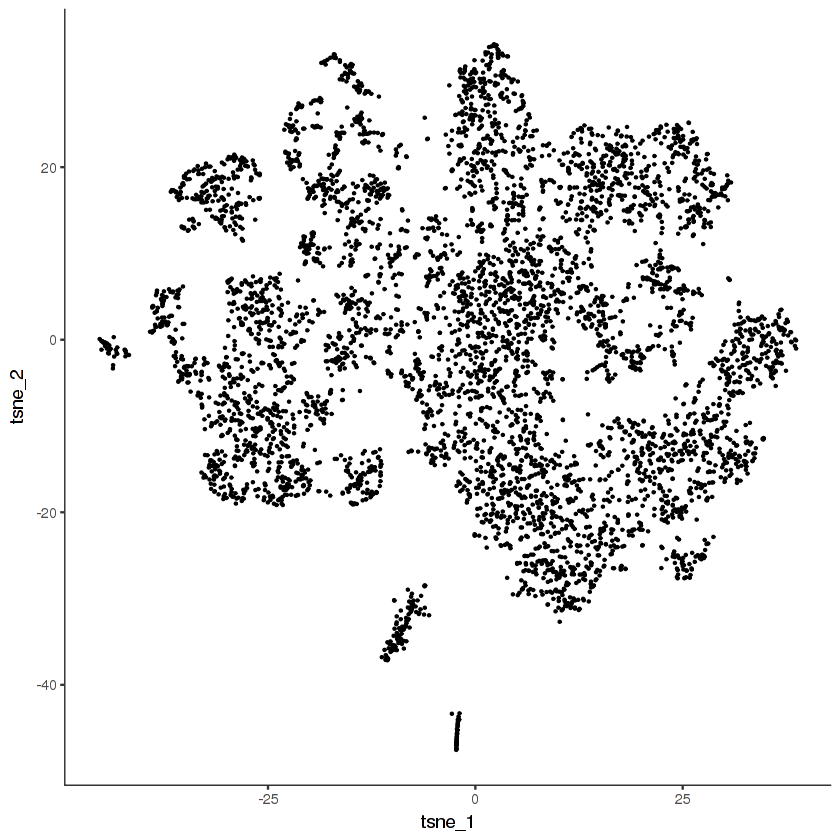

In [16]:
ggplot(pData(cds.hypodermis), aes(x = tsne_1, y = tsne_2)) +
    geom_point(size = 0.2) +
    monocle:::monocle_theme_opts()

Removing batch effects
Remove noise by PCA ...
Reduce dimension by tSNE ...
Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

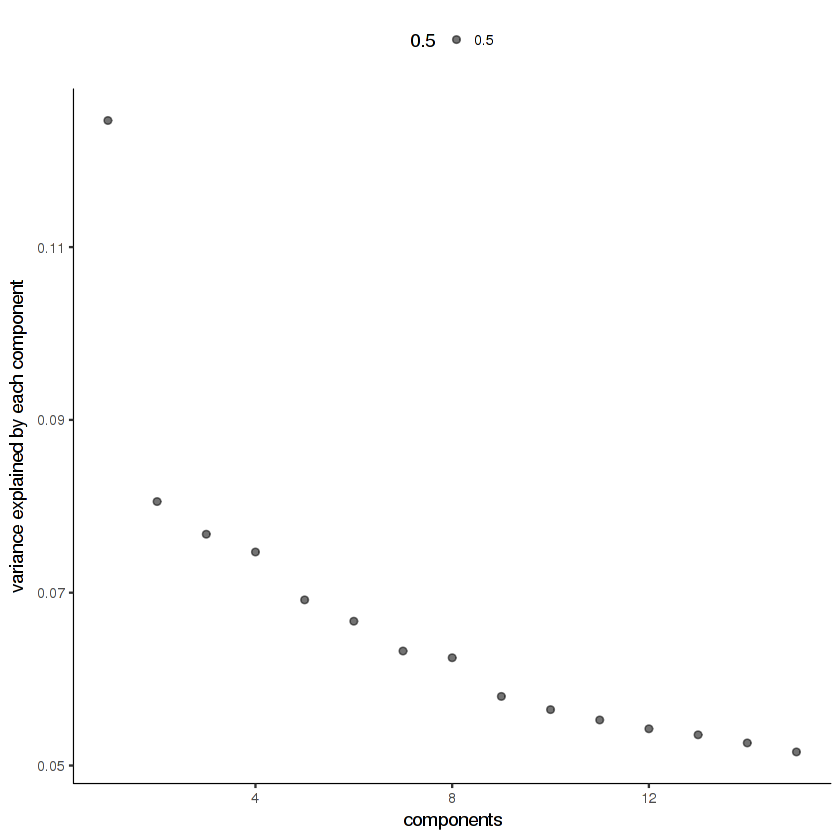

In [17]:
set.seed(42)
cds.glia = reduceDimension(
    cds.glia, max_components = 2, norm_method = "log",
    num_dim = 15, reduction_method = 'tSNE', verbose = T,
    residualModelFormulaStr = "~ plate")

pData(cds.glia)$tsne_1 = reducedDimA(cds.glia)[1,]
pData(cds.glia)$tsne_2 = reducedDimA(cds.glia)[2,]

plot_pc_variance_explained(cds.glia)

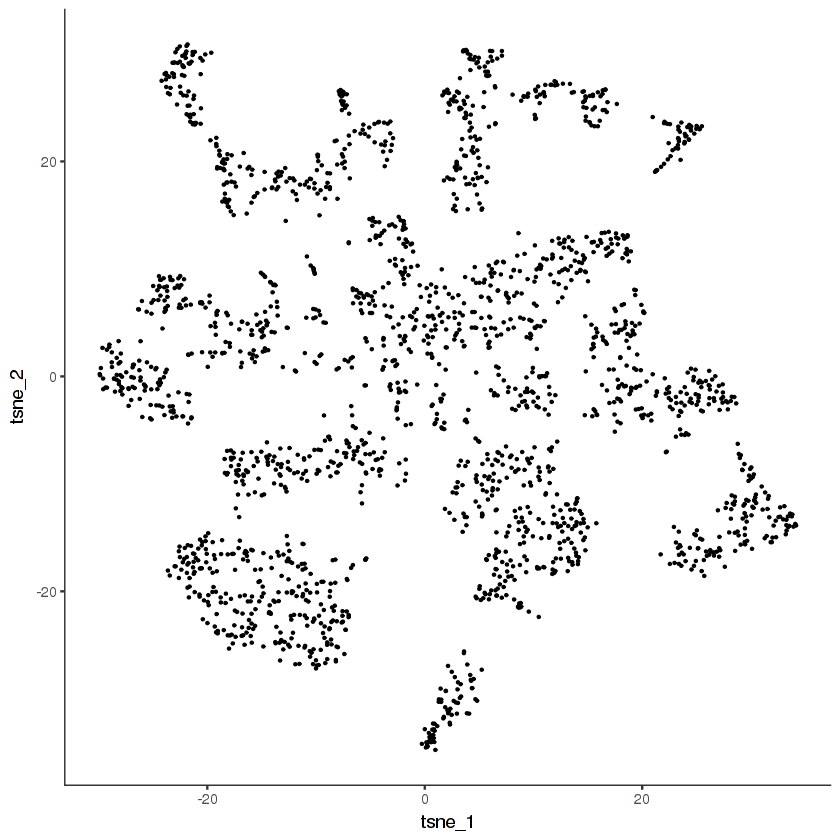

In [18]:
ggplot(pData(cds.glia), aes(x = tsne_1, y = tsne_2)) +
    geom_point(size = 0.2) +
    monocle:::monocle_theme_opts()

Removing batch effects
Remove noise by PCA ...
Reduce dimension by tSNE ...
Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

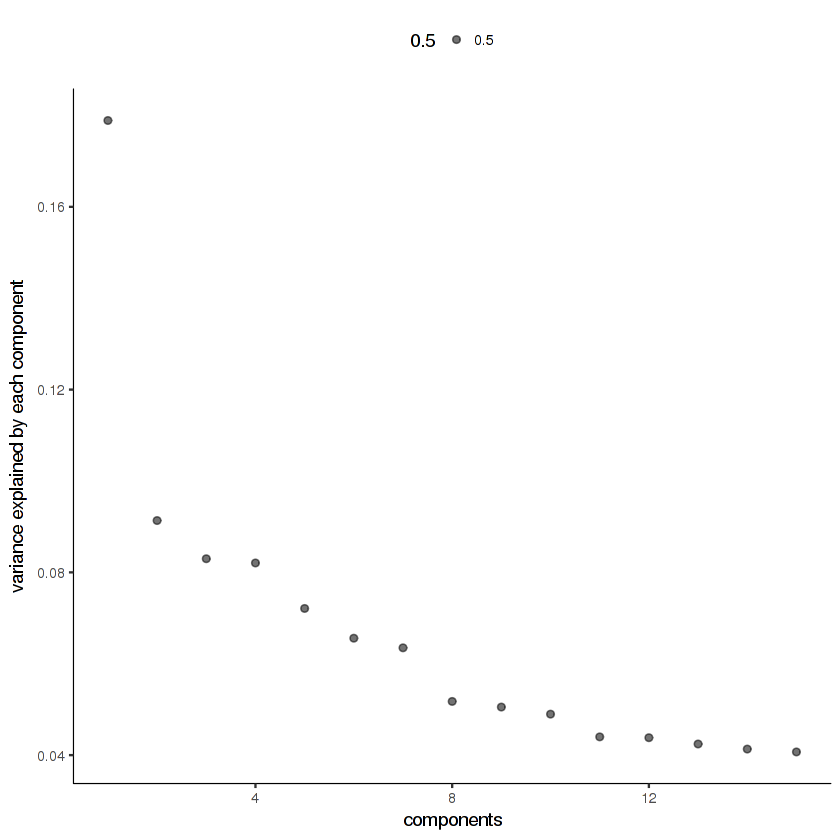

In [19]:
set.seed(42)
cds.gonad = reduceDimension(
    cds.gonad, max_components = 2, norm_method = "log",
    num_dim = 15, reduction_method = 'tSNE', verbose = T,
    residualModelFormulaStr = "~ plate")

pData(cds.gonad)$tsne_1 = reducedDimA(cds.gonad)[1,]
pData(cds.gonad)$tsne_2 = reducedDimA(cds.gonad)[2,]

plot_pc_variance_explained(cds.gonad)

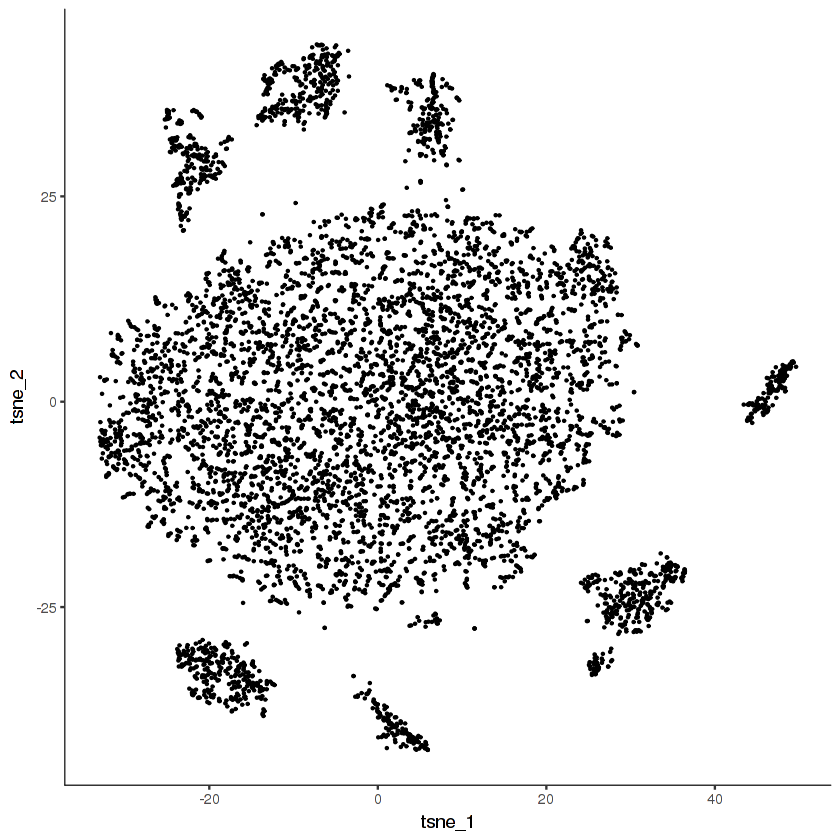

In [20]:
ggplot(pData(cds.gonad), aes(x = tsne_1, y = tsne_2)) +
    geom_point(size = 0.2) +
    monocle:::monocle_theme_opts()

Removing batch effects
Remove noise by PCA ...
Reduce dimension by tSNE ...
Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

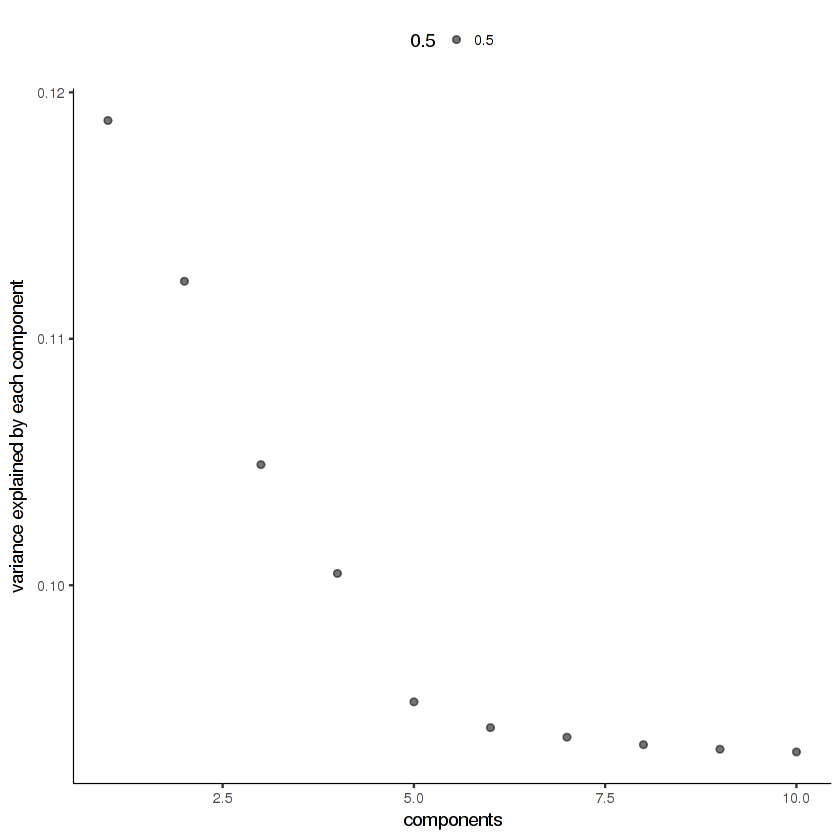

In [82]:
set.seed(42)
cds.coelomocytes = reduceDimension(
    cds.coelomocytes, max_components = 2, norm_method = "log",
    num_dim = 10, reduction_method = 'tSNE', verbose = T,
    residualModelFormulaStr = "~ plate")

pData(cds.coelomocytes)$tsne_1 = reducedDimA(cds.coelomocytes)[1,]
pData(cds.coelomocytes)$tsne_2 = reducedDimA(cds.coelomocytes)[2,]

plot_pc_variance_explained(cds.coelomocytes)

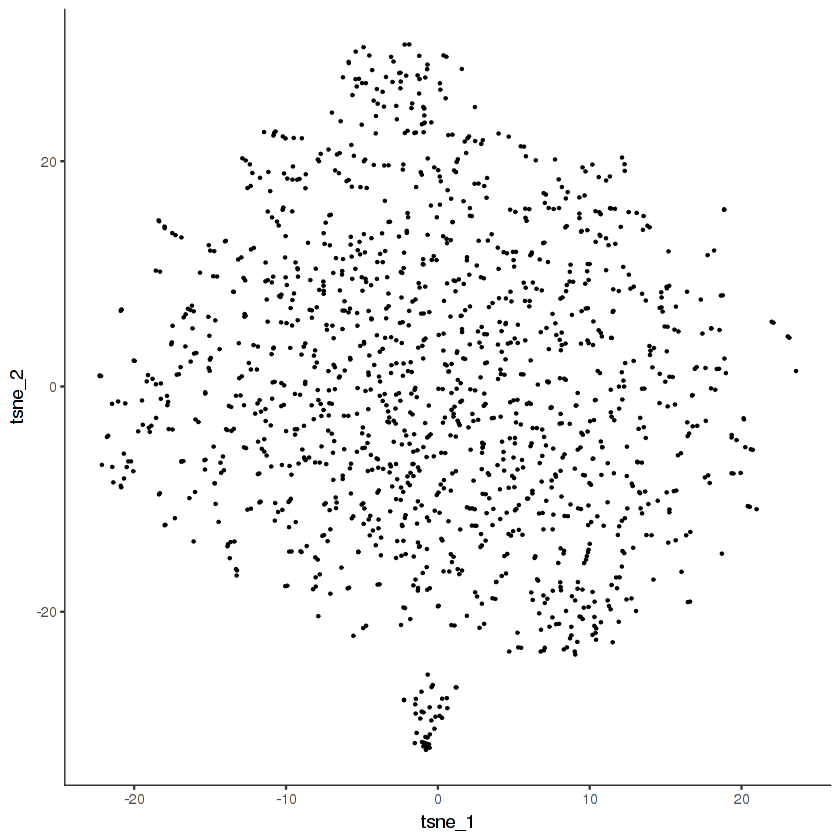

In [83]:
ggplot(pData(cds.coelomocytes), aes(x = tsne_1, y = tsne_2)) +
    geom_point(size = 0.2) +
    monocle:::monocle_theme_opts()

In [84]:
save.image("RData/L2.experiment.1.RData")

In [375]:
cds.bwm = clusterCells_Density_Peak(cds.bwm)

Distance cutoff calculated to 4.041809 


the length of the distance: 62591266


Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

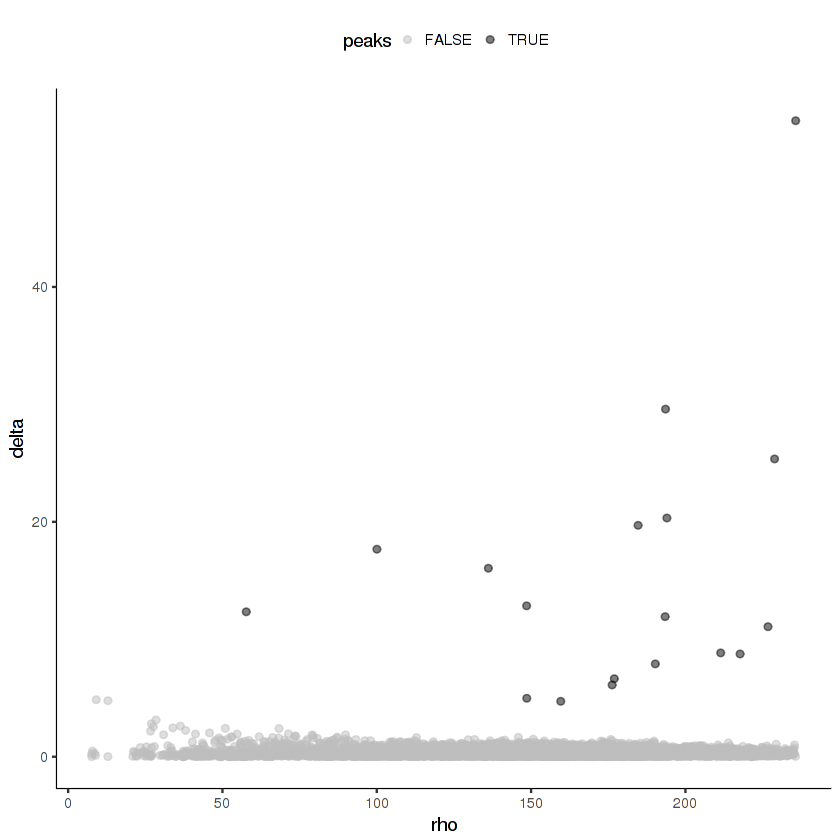

In [376]:
plot_rho_delta(cds.bwm, rho_threshold = 50, delta_threshold = 4)

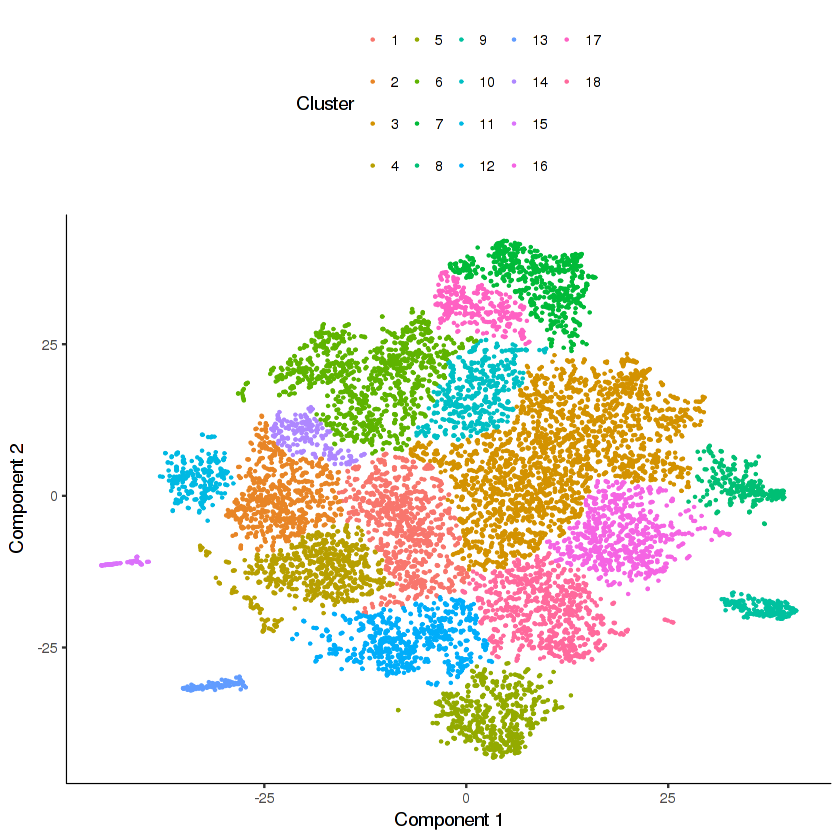

In [377]:
cds.bwm = clusterCells_Density_Peak(cds.bwm,
    rho_threshold = 50, delta_threshold = 4, skip_rho_sigma = T)
plot_cell_clusters(cds.bwm, cell_size = 0.2)

In [29]:
tmp.markers = get.cluster.markers(cds.bwm)

In [ ]:
#  5 posterior BWM (egl-20, fbl-1)
#  6 anterior BWM (sfrp-1)
#  7 anterior BWM (fbl-1)
#  8 doublets (neurons)
#  9 intestinal/rectal muscle
# 12 posterior BWM (cwn-1)
# 13 intestinal/rectal muscle
# 15 doublets (germline)
# 17 anterior BWM (tni-3)
# 18 posterior BWM (cwn-1)

In [78]:
tmp.markers %>% filter(cluster == 18) %>% head(10)

gene_id        cluster score      symbol    num_cells_expressed rank
1  WBGene00018271 18      0.12967581 F41C3.5   8580                 1  
2  WBGene00004422 18      0.09768724 rpl-11.1  6967                 2  
3  WBGene00011832 18      0.07290587 bgal-1    2008                 3  
4  WBGene00001863 18      0.07009974 him-4     8333                 4  
5  WBGene00000857 18      0.05725056 cwn-1     1805                 5  
6  WBGene00003210 18      0.05429499 mel-28    7145                 6  
7  WBGene00019361 18      0.04411682 K03E5.2    837                 7  
8  WBGene00006893 18      0.04253341 spon-1    3863                 8  
9  WBGene00017607 18      0.03991522 F19F10.11 3086                 9  
10 WBGene00017798 18      0.03940765 slc-17.8   415                10

In [25]:
pData(cds)$tissue = ifelse(
    pData(cds)$cell %in% pData(cds.bwm)$cell[pData(cds.bwm)$Cluster %in% c(8, 15)],
    NA, pData(cds)$tissue)

pData(cds)$cell.type = ifelse(
    pData(cds)$cell %in% pData(cds.bwm)$cell[pData(cds.bwm)$Cluster %in% c(8, 15)],
    NA, pData(cds)$cell.type)

In [380]:
cds.pharynx = clusterCells_Density_Peak(cds.pharynx)

Distance cutoff calculated to 2.444931 


the length of the distance: 1991010


Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

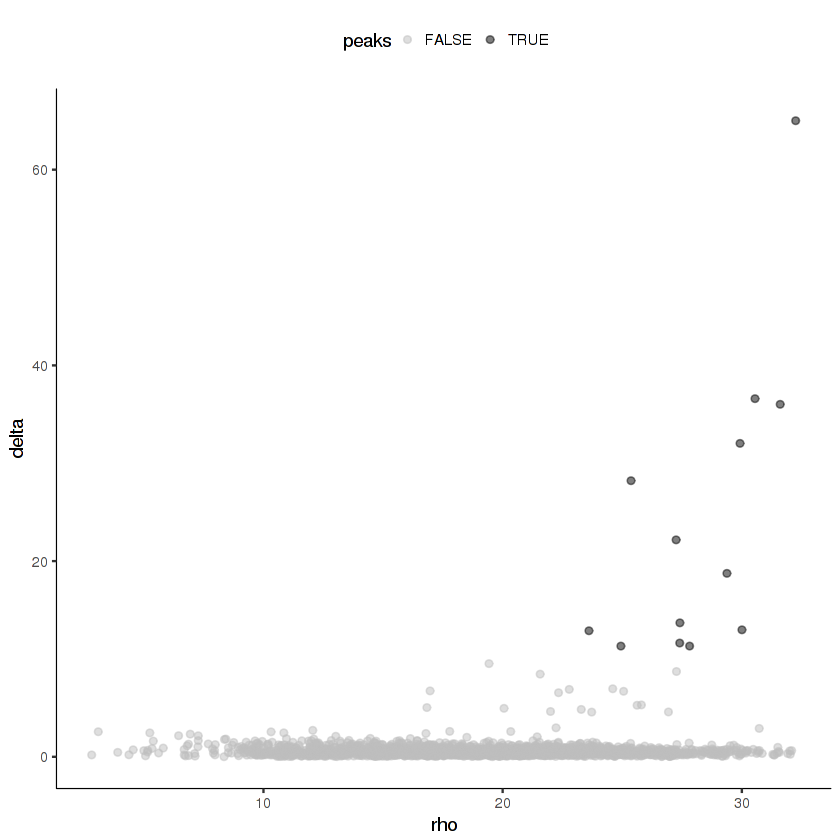

In [381]:
plot_rho_delta(cds.pharynx, rho_threshold = 10, delta_threshold = 10)

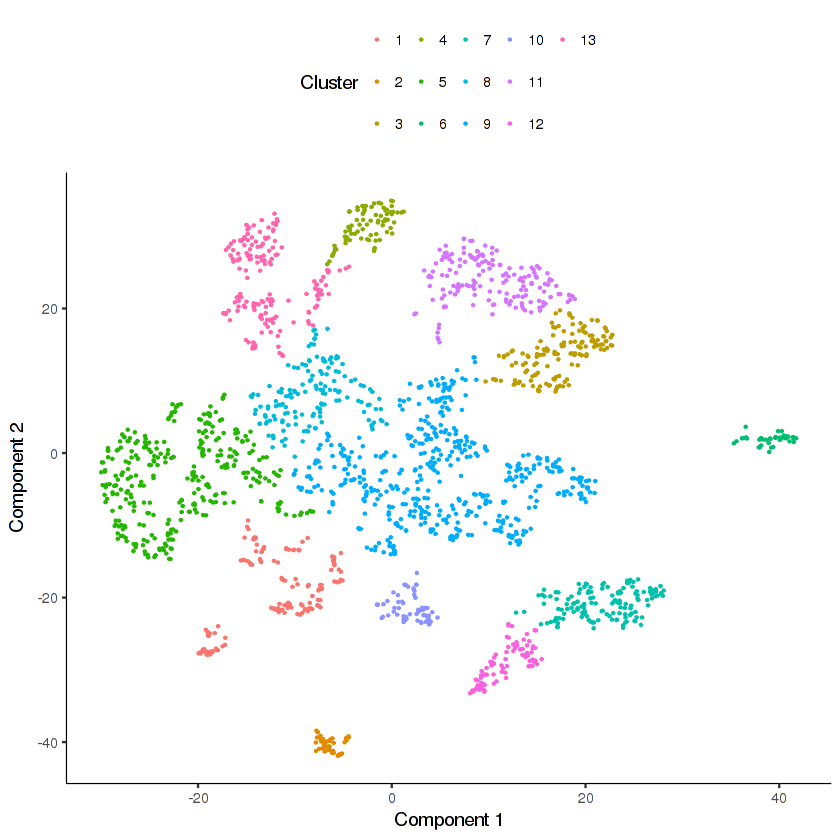

In [382]:
cds.pharynx = clusterCells_Density_Peak(cds.pharynx,
    rho_threshold = 10, delta_threshold = 10, skip_rho_sigma = T)
plot_cell_clusters(cds.pharynx, cell_size = 0.2)

In [95]:
tmp.markers = get.cluster.markers(cds.pharynx)

In [153]:
tmp.markers %>% filter(cluster == 13) %>% head(10)

gene_id        cluster score     symbol    num_cells_expressed rank
1  WBGene00012942 13      1.1572846 Y47D3B.6   756                 1  
2  WBGene00014039 13      1.1116638 ZK662.2    602                 2  
3  WBGene00017937 13      1.0655494 F30H5.3    440                 3  
4  WBGene00044011 13      0.7977801 T06E4.12   566                 4  
5  WBGene00000497 13      0.7881339 chs-2      762                 5  
6  WBGene00022287 13      0.7364067 Y75B7AR.1  378                 6  
7  WBGene00013926 13      0.7235990 nep-1      550                 7  
8  WBGene00011757 13      0.7056090 cht-2      340                 8  
9  WBGene00001054 13      0.6017406 dpf-1     1904                 9  
10 WBGene00010573 13      0.5475155 K04H4.2    571                10

In [ ]:
# 2 mystery (pharygeal-intestinal valve?)
# 3 anterior pharynx (pgp-14), not muscle
# 6 doublets (BWM)
# 7 pharyngeal gland
# 9 anterior pharynx (pgp-14), mostly muscle
# 10 pharyngeal muscle, mostly pgp-14(-)
# 11 anterior pharynx (pgp-14), not muscle
# 12 pharyngeal gland

In [26]:
pData(cds)$tissue = ifelse(
    pData(cds)$cell %in% pData(cds.pharynx)$cell[pData(cds.pharynx)$Cluster %in% c(6)],
    NA, pData(cds)$tissue)

pData(cds)$cell.type = ifelse(
    pData(cds)$cell %in% pData(cds.pharynx)$cell[pData(cds.pharynx)$Cluster %in% c(6)],
    NA, pData(cds)$cell.type)

In [384]:
cds.hypodermis = clusterCells_Density_Peak(cds.hypodermis)

Distance cutoff calculated to 3.926673 


the length of the distance: 14388930


Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

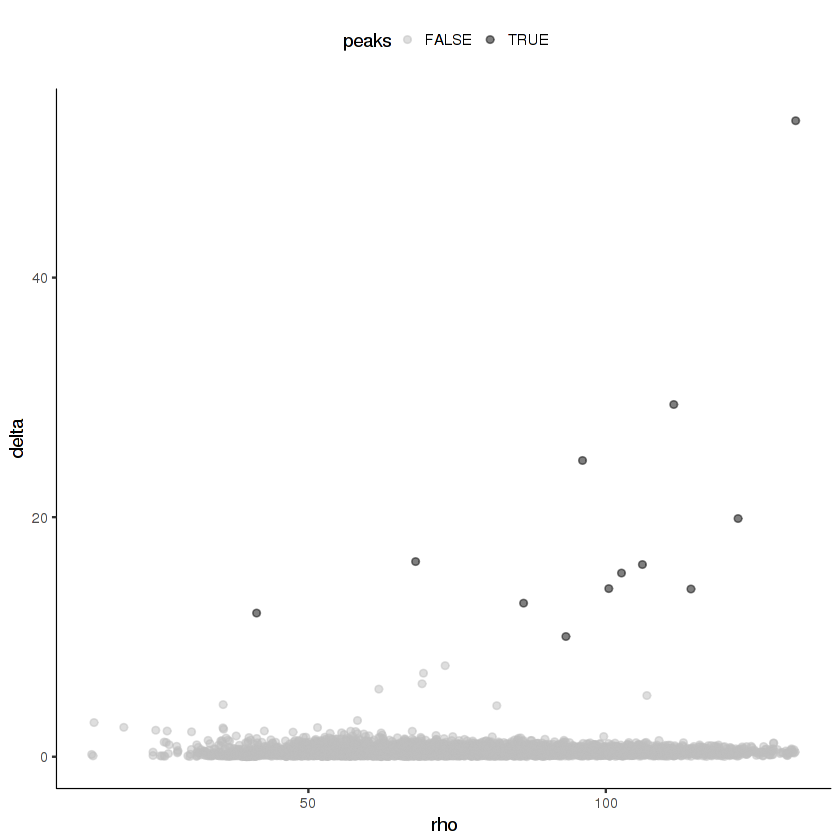

In [385]:
plot_rho_delta(cds.hypodermis, rho_threshold = 10, delta_threshold = 10)

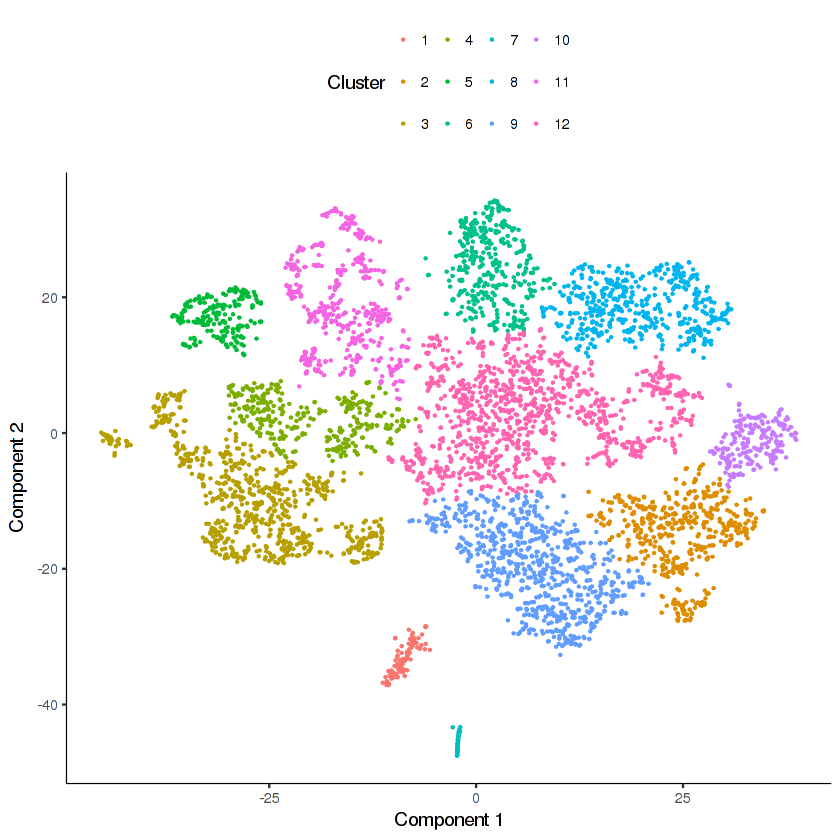

In [386]:
cds.hypodermis = clusterCells_Density_Peak(cds.hypodermis,
    rho_threshold = 10, delta_threshold = 10, skip_rho_sigma = T)
plot_cell_clusters(cds.hypodermis, cell_size = 0.2)

In [166]:
tmp.markers = get.cluster.markers(cds.hypodermis)

In [207]:
tmp.markers %>% filter(cluster == 13) %>% head(10)

gene_id cluster score symbol num_cells_expressed rank

In [ ]:
#  1 doublets (BWM)
#  2 seam cells
#  3 non-seam hypodermis (mup-4)
#  4 non-seam hypodermis / ???
#  5 non-seam hypodermis / rectum (qua-1)
#  6 seam cells fusing into hyp7? (eff-1)
#  7 doublets (germline)
#  8 seam cells
#  9 seam cells
# 10 seam cells
# 11 ??? dpy-5(-) head and tail hypodermis?
# 12 seam cells

In [27]:
pData(cds)$tissue = ifelse(
    pData(cds)$cell %in% pData(cds.hypodermis)$cell[pData(cds.hypodermis)$Cluster %in% c(1, 7)],
    NA, pData(cds)$tissue)

pData(cds)$cell.type = ifelse(
    pData(cds)$cell %in% pData(cds.hypodermis)$cell[pData(cds.hypodermis)$Cluster %in% c(1, 7)],
    NA, pData(cds)$cell.type)

In [388]:
cds.glia = clusterCells_Density_Peak(cds.glia)

Distance cutoff calculated to 3.418047 


the length of the distance: 2231328


Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

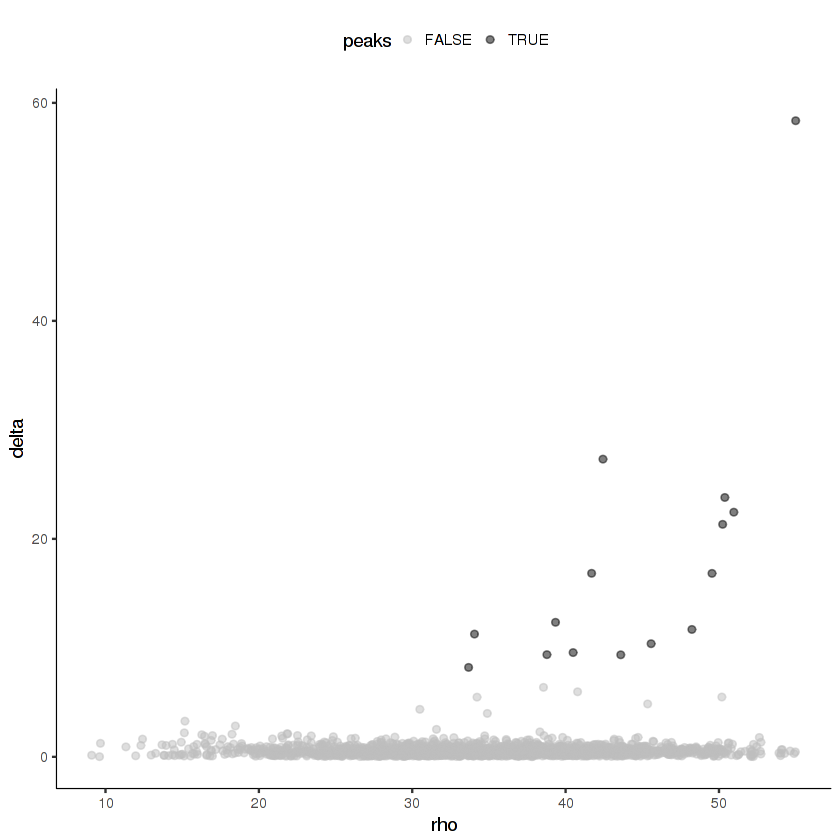

In [389]:
plot_rho_delta(cds.glia, rho_threshold = 10, delta_threshold = 8)

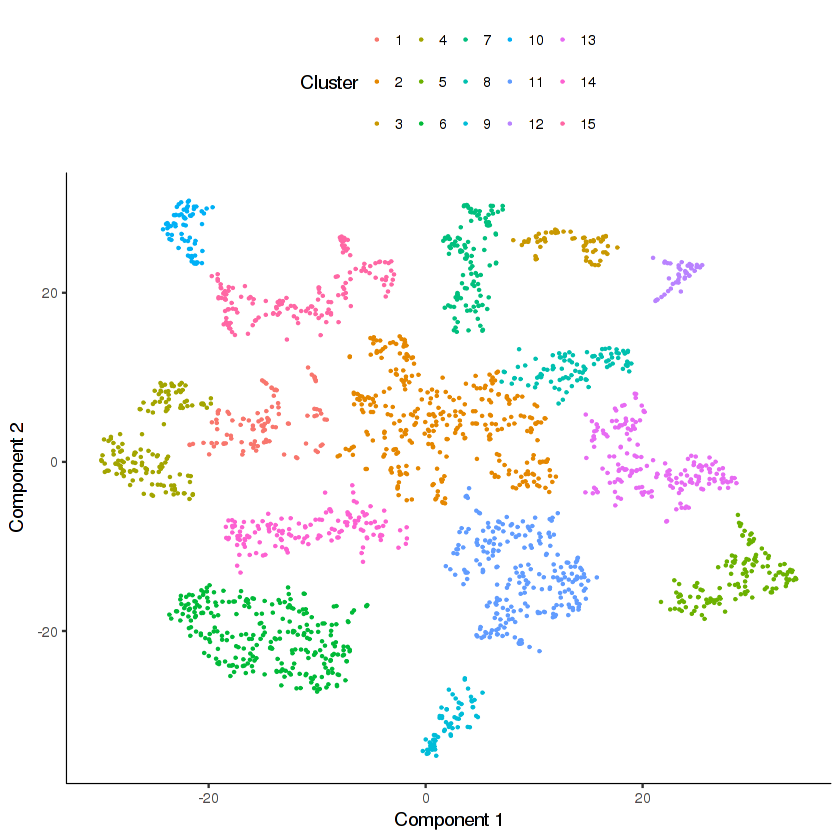

In [390]:
cds.glia = clusterCells_Density_Peak(cds.glia,
    rho_threshold = 10, delta_threshold = 8, skip_rho_sigma = T)
plot_cell_clusters(cds.glia, cell_size = 0.2)

In [244]:
tmp.markers = get.cluster.markers(cds.glia)

In [344]:
tmp.markers %>% filter(cluster == 15) %>% head(10)

gene_id        cluster score    symbol    num_cells_expressed rank
1  WBGene00010464 15      4.965188 K01D12.5   140                 1  
2  WBGene00044109 15      4.081127 K02E11.10  466                 2  
3  WBGene00018297 15      3.110156 F41F3.3   3699                 3  
4  WBGene00022679 15      2.684690 ZK180.5   2975                 4  
5  WBGene00009983 15      2.625125 cut-2     3801                 5  
6  WBGene00018418 15      1.850777 F44E2.4   1216                 6  
7  WBGene00011928 15      1.780288 cutl-12    211                 7  
8  WBGene00000692 15      1.680591 col-118    260                 8  
9  WBGene00021625 15      1.525930 Y47D7A.13 4158                 9  
10 WBGene00011436 15      1.422222 T04F3.1   2276                10

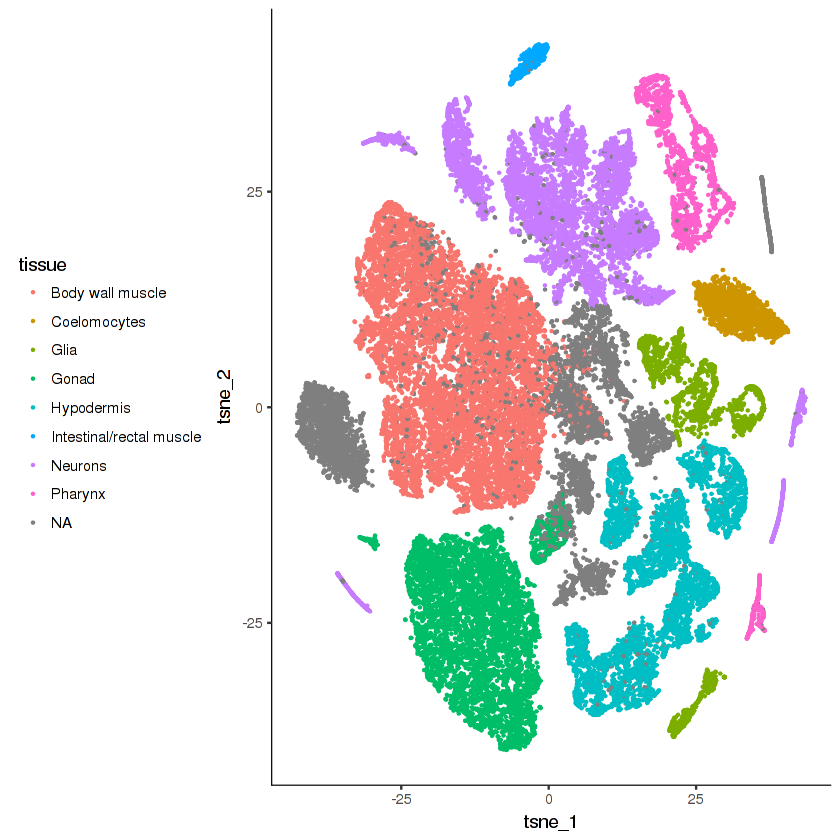

In [236]:
# 1 lin-44, grl-1
# 4 lin-44, grl-l, grd-15
# 5 cat-2, dat-1, egl-23, ida-1; either neuron doublets or male spicules (R*)
# 7 vap-1 (amphid sheath cells)
# 9 doublets (BWM)
# 11 nlp-16, kcc-3
# 12 grl-14 (arcade cells???)
# 14 fig-1 but not vap-1 (phasmid socket cells)

# 10 ifa-4, possibly the excretory cell?
# 15 excretory duct, pore, and socket cells (grl-2, fmo-4)

# lin-44 + grl-1/grd-15 = phasmid socket
# grd-15 - lin-44 = amphid socket?

# lin-48, ifa-4, ifb-1, mua-3

In [28]:
cds.glia = set.cell.type(cds.glia, "Excretory cells",
    pData(cds.glia)$Cluster == 10 | (pData(cds.glia)$Cluster == 15 &
        expresses.gene(cds.glia, "grl-2") + expresses.gene(cds.glia, "K01D12.5") +
        expresses.gene(cds.glia, "K02E11.10") + expresses.gene(cds.glia, "cutl-12") > 0))

cds = set.tissue(cds, "Excretory cells", pData(cds)$cell %in% pData(cds.glia)$cell[
    with(pData(cds.glia), !is.na(cell.type) & cell.type == "Excretory cells")])

cds = set.cell.type(cds, "Excretory cells", pData(cds)$cell %in% pData(cds.glia)$cell[
    with(pData(cds.glia), !is.na(cell.type) & cell.type == "Excretory cells")])

pData(cds)$tissue = ifelse(
    pData(cds)$cell %in% pData(cds.glia)$cell[pData(cds.glia)$Cluster %in% c(9)],
    NA, pData(cds)$tissue)

pData(cds)$cell.type = ifelse(
    pData(cds)$cell %in% pData(cds.glia)$cell[pData(cds.glia)$Cluster %in% c(9)],
    NA, pData(cds)$cell.type)

In [398]:
cds.gonad = clusterCells_Density_Peak(cds.gonad)

Distance cutoff calculated to 4.091555 


the length of the distance: 22791376


Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

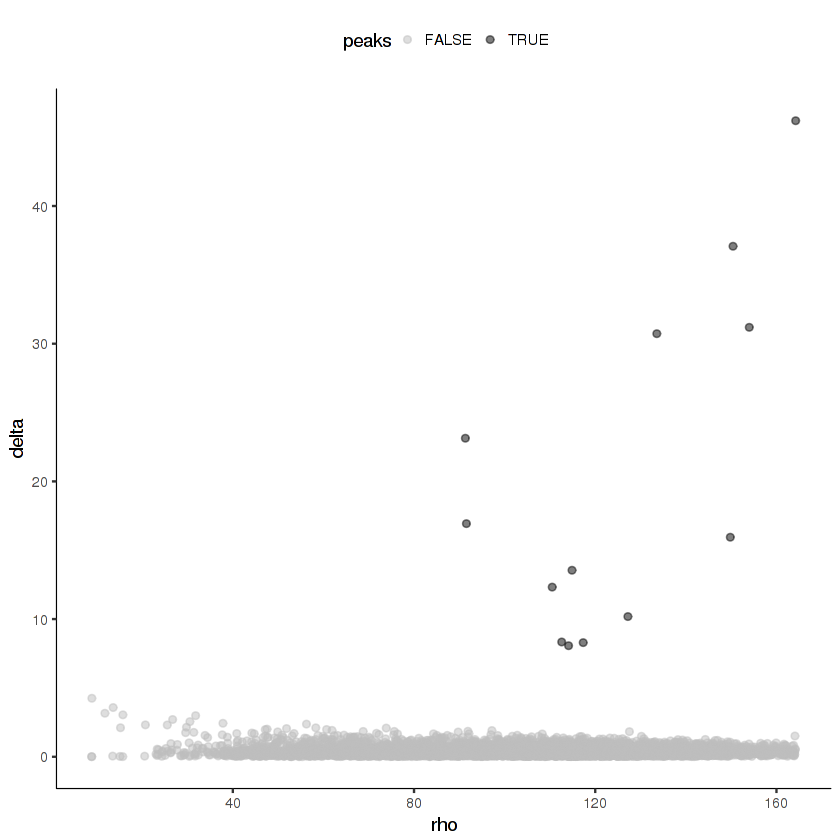

In [399]:
plot_rho_delta(cds.gonad, rho_threshold = 10, delta_threshold = 8)

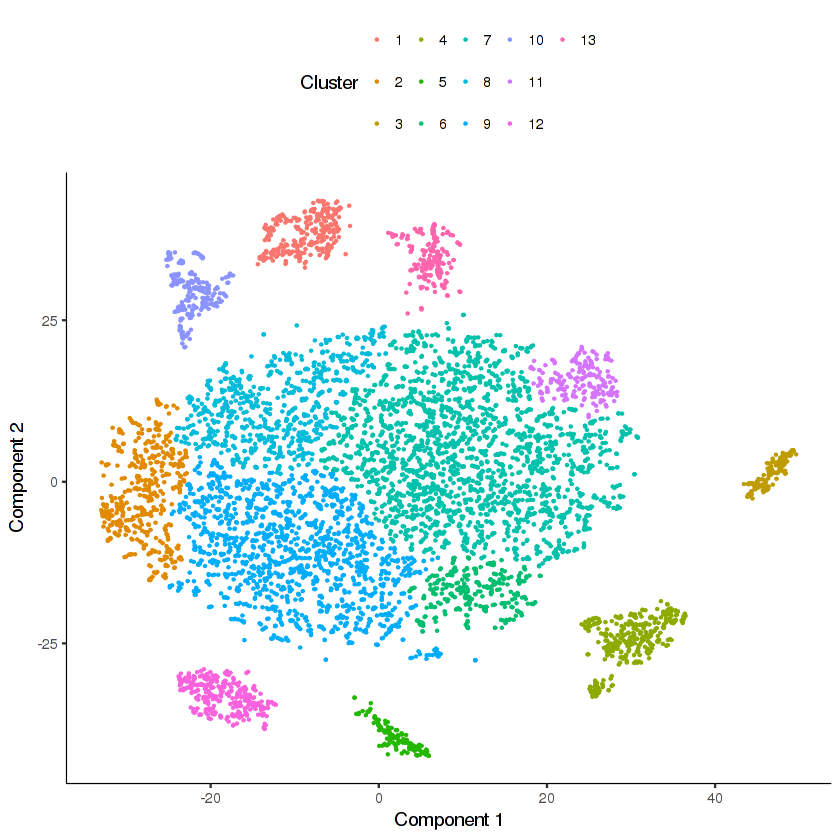

In [400]:
cds.gonad = clusterCells_Density_Peak(cds.gonad,
    rho_threshold = 10, delta_threshold = 8, skip_rho_sigma = T)
plot_cell_clusters(cds.gonad, cell_size = 0.2)

In [401]:
tmp.markers = get.cluster.markers(cds.gonad)

In [424]:
tmp.markers %>% filter(cluster == 13) %>% head(10)

gene_id        cluster score     symbol  num_cells_expressed rank
1  WBGene00003891 13      1.0443406 osm-11   1051                1  
2  WBGene00018468 13      0.7825346 tag-80   6118                2  
3  WBGene00001189 13      0.7346243 egl-21   3889                3  
4  WBGene00000998 13      0.6519550 dig-1   15497                4  
5  WBGene00002048 13      0.5669383 ida-1    4482                5  
6  WBGene00001385 13      0.5074178 far-1   13871                6  
7  WBGene00020854 13      0.4274403 T27C4.1  4287                7  
8  WBGene00006436 13      0.4192149 ttn-1   16646                8  
9  WBGene00001172 13      0.4043354 egl-3    3981                9  
10 WBGene00017671 13      0.3952598 pgal-1   3187               10

In [ ]:
#  1 VPCs
#  2 germline
#  3 distal tip cells
#  4 somatic gonad precursors
#  5 doublets (BWM)
#  6 germline
#  7 germline
#  8 germline
#  9 germline
# 10 VPCs
# 11 germline
# 12 sex myoblasts
# 13 doublets (neurons)

In [29]:
pData(cds)$tissue = ifelse(
    pData(cds)$cell %in% pData(cds.gonad)$cell[pData(cds.gonad)$Cluster %in% c(5, 13)],
    NA, pData(cds)$tissue)

pData(cds)$cell.type = ifelse(
    pData(cds)$cell %in% pData(cds.gonad)$cell[pData(cds.gonad)$Cluster %in% c(5, 13)],
    NA, pData(cds)$cell.type)

In [431]:
cds.coelomocytes = clusterCells_Density_Peak(cds.coelomocytes)

Distance cutoff calculated to 2.926453 


the length of the distance: 975106


Warning message in grid.Call.graphics(L_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”

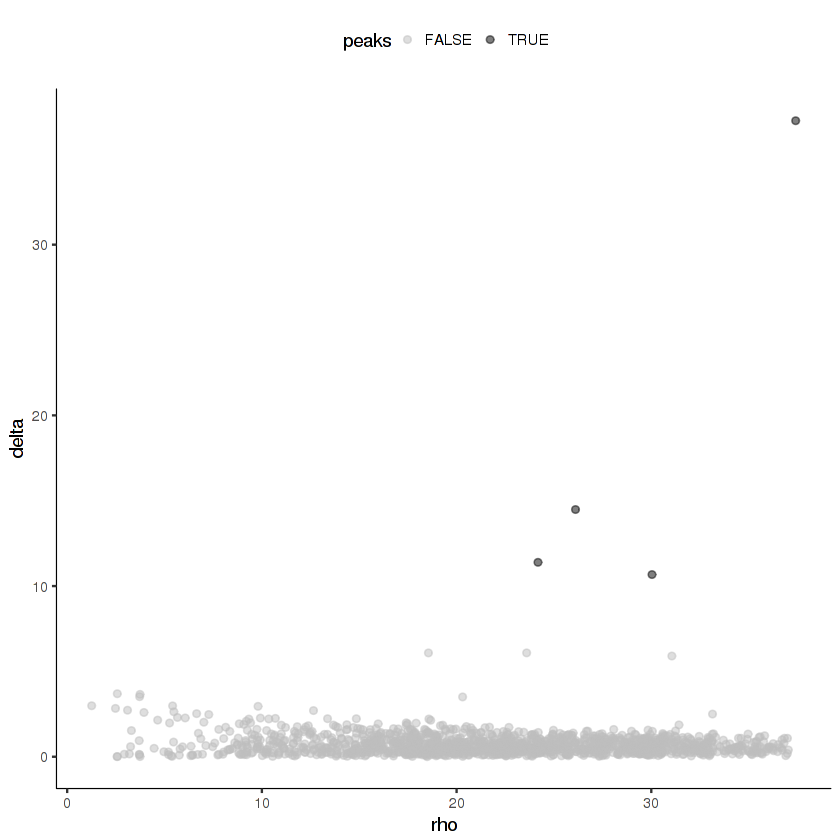

In [435]:
plot_rho_delta(cds.coelomocytes, rho_threshold = 10, delta_threshold = 10)

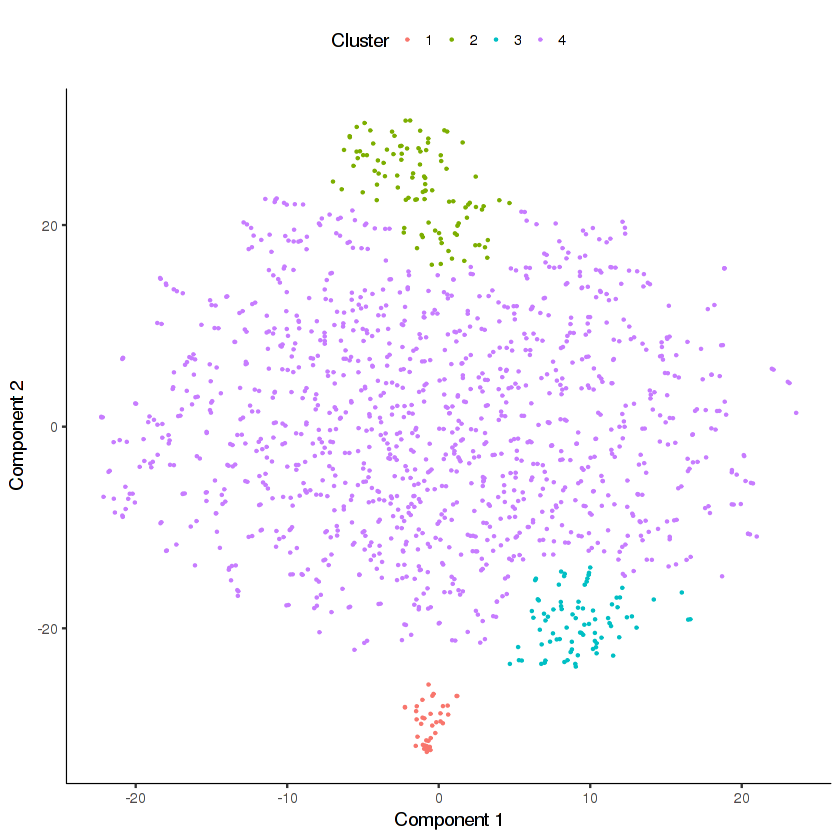

In [436]:
cds.coelomocytes = clusterCells_Density_Peak(cds.coelomocytes,
    rho_threshold = 10, delta_threshold = 10, skip_rho_sigma = T)
plot_cell_clusters(cds.coelomocytes, cell_size = 0.2)

In [437]:
tmp.markers = get.cluster.markers(cds.coelomocytes)

In [440]:
tmp.markers %>% filter(cluster == 4) %>% head()

gene_id        cluster score      symbol num_cells_expressed rank
1 WBGene00015061 4       0.13716309 cpna-2 14655               1   
2 WBGene00006436 4       0.08093697 ttn-1  16646               2   
3 WBGene00000066 4       0.04403650 act-4  18319               3   
4 WBGene00004736 4       0.03321307 sca-1  16669               4   
5 WBGene00002280 4       0.03247029 let-2  13699               5   
6 WBGene00018700 4       0.03087861 lmd-3   5906               6

In [ ]:
# 1 doublets (BWM)
# 2-4 genuine coelomocytes

In [30]:
pData(cds)$tissue = ifelse(
    pData(cds)$cell %in% pData(cds.coelomocytes)$cell[pData(cds.coelomocytes)$Cluster %in% c(1)],
    NA, pData(cds)$tissue)

pData(cds)$cell.type = ifelse(
    pData(cds)$cell %in% pData(cds.coelomocytes)$cell[pData(cds.coelomocytes)$Cluster %in% c(1)],
    NA, pData(cds)$cell.type)

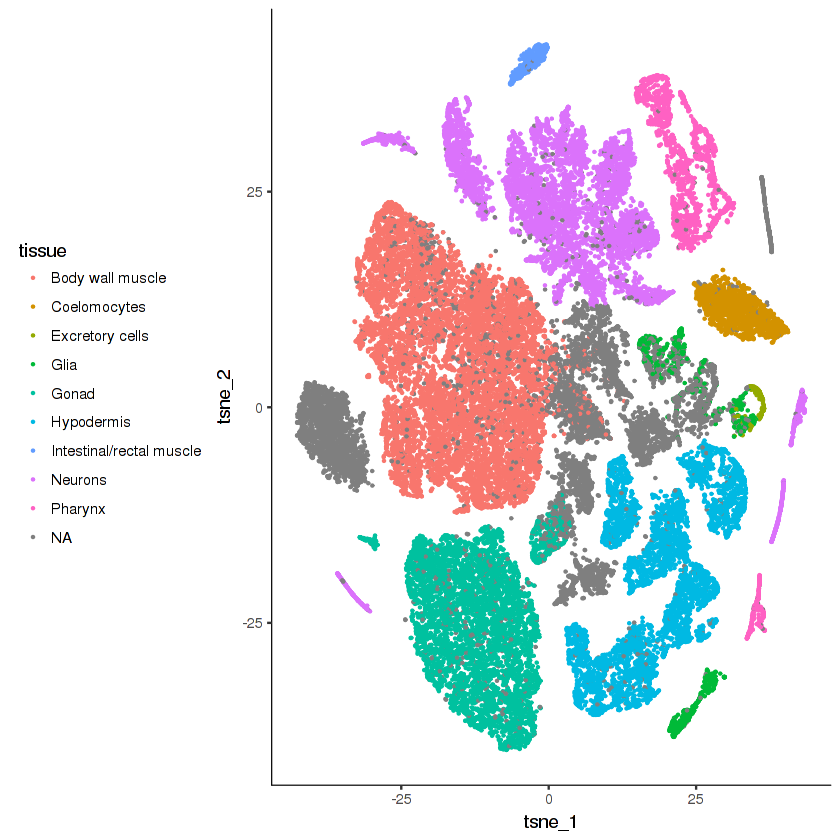

In [442]:
plot.tissues(cds)

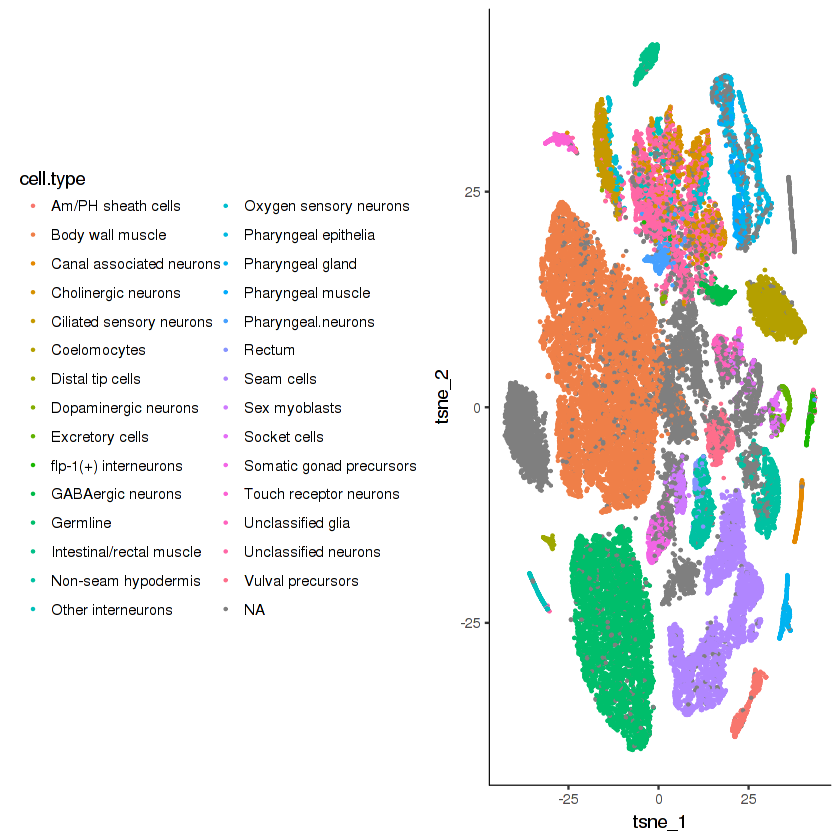

In [443]:
plot.cell.types(cds)

In [444]:
pData(cds) %>% group_by(cell.type) %>% summarize(n = n()) %>% arrange(-n)

cell.type                n    
1  Body wall muscle         10508
2  NA                        9184
3  Germline                  5144
4  Seam cells                3523
5  Unclassified neurons      2639
6  Coelomocytes              1358
7  Non-seam hypodermis       1268
8  Cholinergic neurons       1015
9  Ciliated sensory neurons   842
10 Pharyngeal epithelia       747
11 Vulval precursors          488
12 Other interneurons         443
13 Am/PH sheath cells         421
14 GABAergic neurons          400
15 Socket cells               358
16 Somatic gonad precursors   355
17 Intestinal/rectal muscle   338
18 Touch receptor neurons     334
19 Pharyngeal muscle          332
20 Pharyngeal.neurons         314
21 Oxygen sensory neurons     305
22 Sex myoblasts              302
23 Pharyngeal gland           271
24 Canal associated neurons   239
25 flp-1(+) interneurons      224
26 Unclassified glia          208
27 Excretory cells            155
28 Distal tip cells           129
29 Rectum                     121
30 Dopaminergic neurons        70

In [31]:
doublet.cell.ids = c(
    as.character(pData(cds.neurons)$cell[pData(cds.neurons)$Cluster %in% c(35)]),
    as.character(pData(cds.bwm)$cell[pData(cds.bwm)$Cluster %in% c(8, 15)]),
    as.character(pData(cds.pharynx)$cell[pData(cds.pharynx)$Cluster %in% c(6)]),
    as.character(pData(cds.hypodermis)$cell[pData(cds.hypodermis)$Cluster %in% c(1, 7)]),
    as.character(pData(cds.glia)$cell[pData(cds.glia)$Cluster %in% c(9)]),
    as.character(pData(cds.gonad)$cell[pData(cds.gonad)$Cluster %in% c(5, 13)]),
    as.character(pData(cds.coelomocytes)$cell[pData(cds.coelomocytes)$Cluster %in% c(1)]))

In [32]:
length(doublet.cell.ids)
length(unique(doublet.cell.ids))
pData(cds)[pData(cds)$cell %in% doublet.cell.ids,] %>%
    group_by(tissue) %>% summarize(n = n()) %>% arrange(-n) %>% head(2)
pData(cds)[pData(cds)$cell %in% doublet.cell.ids,] %>%
    group_by(cell.type) %>% summarize(n = n()) %>% arrange(-n) %>% head(2)

[1] 1190

[1] 1190

tissue n   
1 NA     1190

cell.type n   
1 NA        1190

In [34]:
save.image("RData/L2.experiment.1.RData")

In [35]:
cds.experiment.1 = cds
doublet.ids.experiment.1 = doublet.cell.ids

save(list = c(
        "cds.experiment.1", "cds.neurons", "doublet.ids.experiment.1",
        "expresses.gene", "get.gene.id", "plot.expr",
        "plot.tissues", "plot.cell.types", "plot.fine.grained.neuron.types"),
    file = "RData/L2.experiment.1.no-cruft.RData")

rm(cds.experiment.1)
rm(doublet.ids.experiment.1)